# THỰC HÀNH: CÁC GIẢI THUẬT PHÂN LOẠI CƠ BẢN

## 2.1. GIẢI THUẬT 1: CÂY QUYẾT ĐỊNH VÀ RỪNG CÂY

### 2.1.2. Bài làm mẫu

#### Bài toán 1: Xây dựng cây quyết định và rừng cây với dữ liệu lấy từ
https://www.kaggle.com/datasets/deceneu/default-of-credit-card-clients

***

##### Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

**1. Tải một số package mà chúng tôi sử dụng và package graphviz, để vẽ cây quyết định**

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

**2. Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết**

In [2]:
df = pd.read_csv('dataset/default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

**3. Chuẩn bị dữ liệu cho tập train và tập test**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,  # Features (all columns except the last one)
    df['default payment next month'].values,  # Target variable
    test_size=0.2, 
    random_state=24,
    stratify=df['default payment next month'].values  # Optional: for stratified sampling
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Training set - Class distribution: {np.bincount(y_train)}")
print(f"Test set - Class distribution: {np.bincount(y_test)}")

Training set size: 24000 samples
Test set size: 6000 samples
Number of features: 17
Training set - Class distribution: [18691  5309]
Test set - Class distribution: [4673 1327]


**4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn**

In [4]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**5. Hiển thị cây quyết định với package graphviz (thay thế bằng matplotlib)**

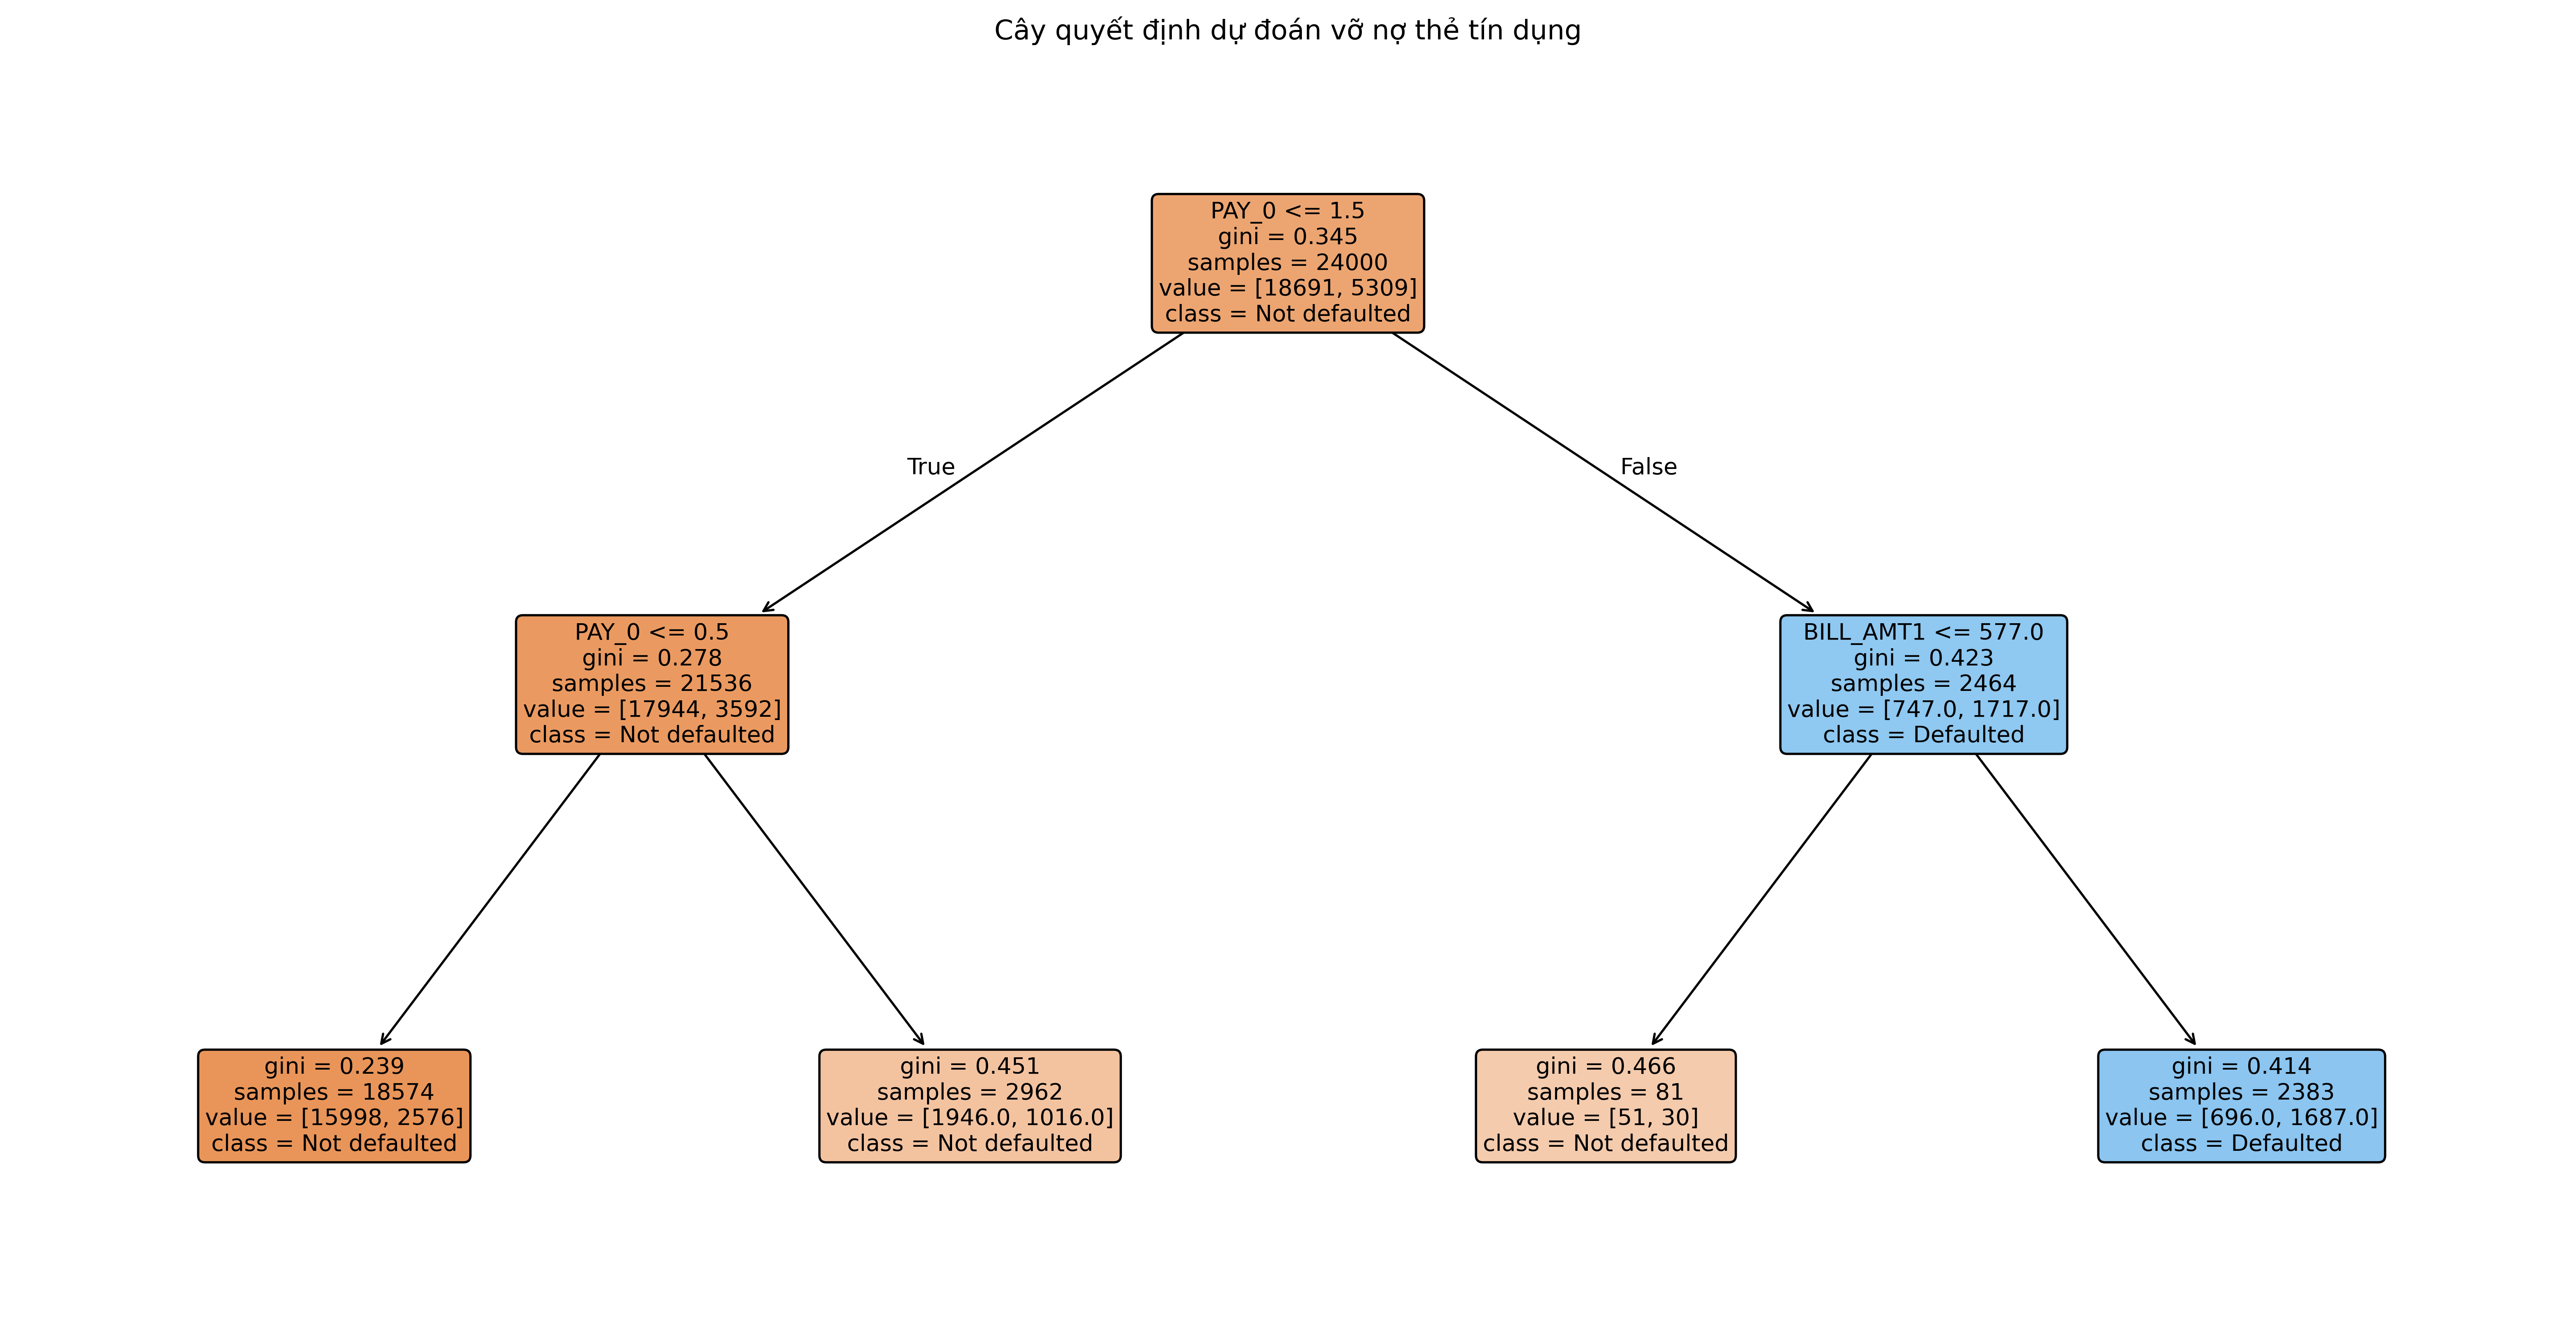

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, 
          filled=True,
          rounded=True,
          feature_names=features_response[:-1],
          class_names=['Not defaulted', 'Defaulted'],
          fontsize=10,
          max_depth=3)  # Hiển thị 3 tầng đầu cho dễ nhìn
plt.title('Cây quyết định dự đoán vỡ nợ thẻ tín dụng')
plt.show()

##### Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

**1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu**

**2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu**

In [8]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
#Thử 7 giá trị độ sâu khác nhau từ cây rất nông (depth=1) đến khá sâu (depth=12)

dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
#scoring='roc_auc' → Ưu tiên phân loại tốt (AUC quan trọng hơn accuracy)

#cv=4 → 4-fold cross-validation (chia data thành 4 phần, train 3 test 1)

#refit=True → Tự động train lại model tốt nhất trên toàn bộ data

#verbose=1 → Hiển thị tiến trình

return_train_score=True → Ghi lại điểm train để so sánh overfitting
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [19]:
# Sau khi chạy xong, xem kết quả:
print("Độ sâu tốt nhất:", cv.best_params_)
print("Điểm AUC tốt nhất:", cv.best_score_)

# Model tốt nhất đã được train tự động
best_dt = cv.best_estimator_

Độ sâu tốt nhất: {'max_depth': 6}
Điểm AUC tốt nhất: 0.7464000301203957


**3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau**

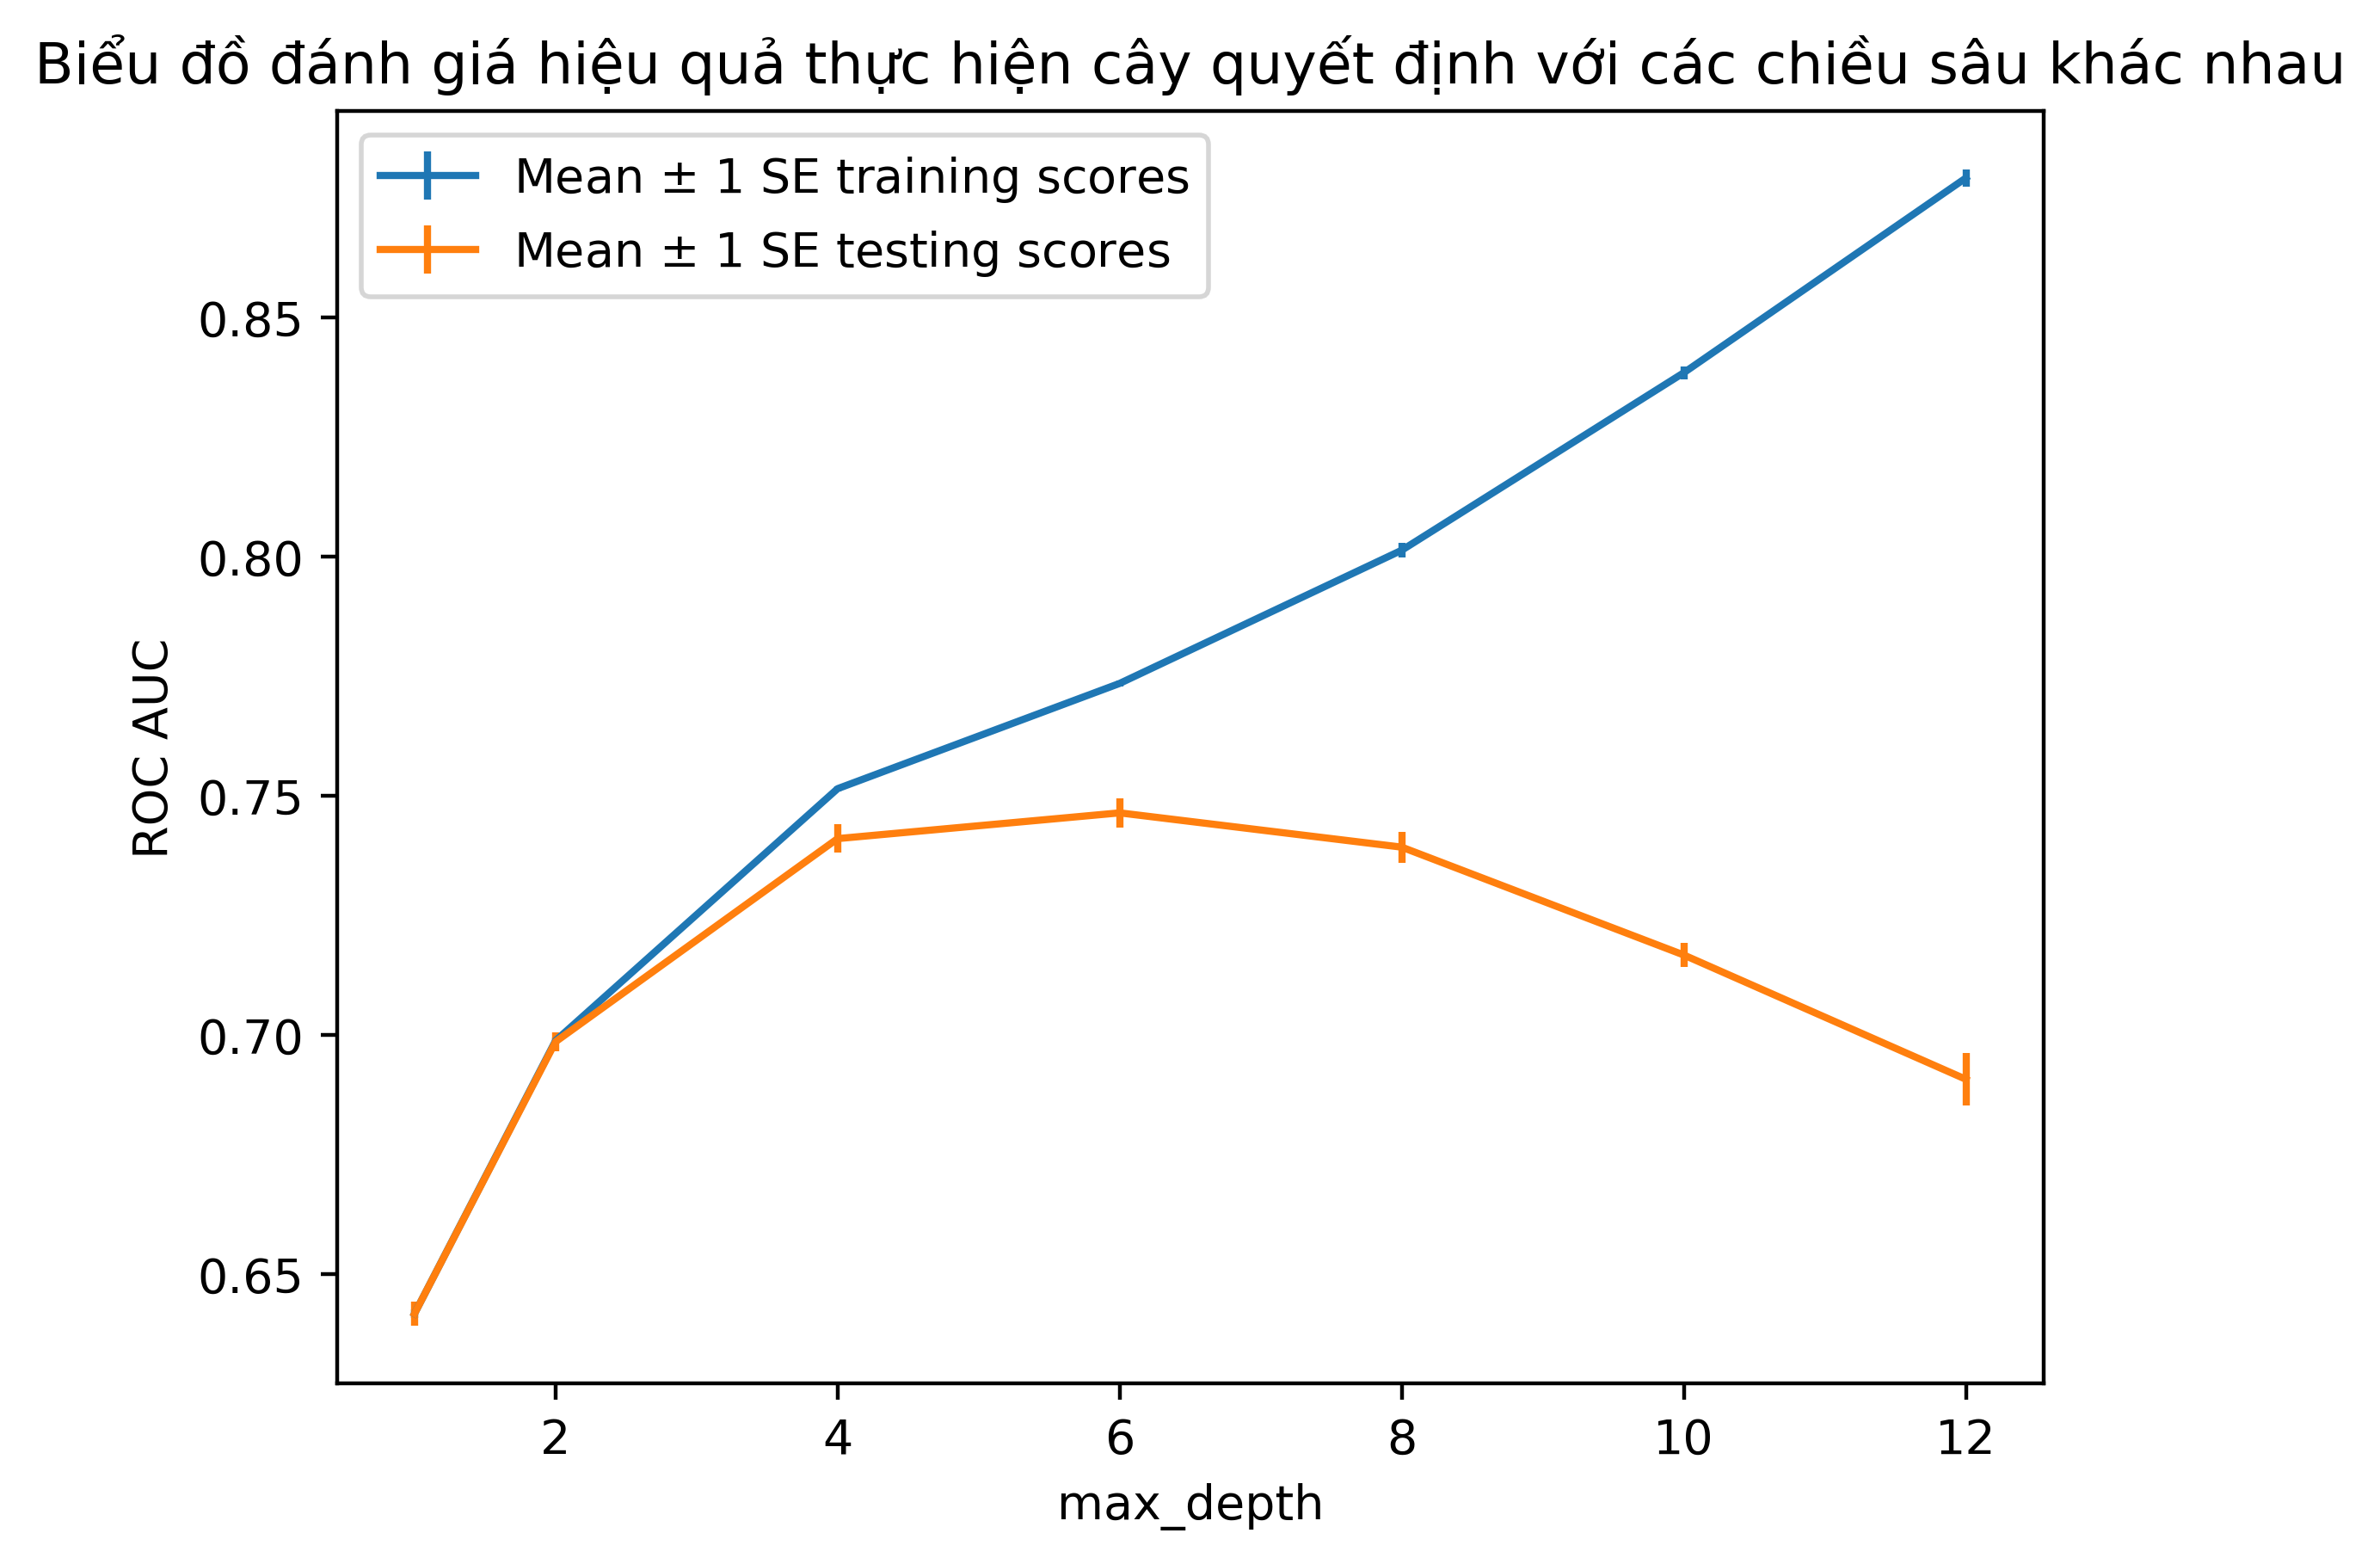

In [13]:
cv_results_df = pd.DataFrame(cv.cv_results_)

# View the names of the remaining columns in the results DataFrame
cv_results_df.columns

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Biểu đồ đánh giá hiệu quả thực hiện cây quyết định với các chiều sâu khác nhau')
plt.show()

##### Nhiệm vụ 3: Xây dựng rừng cây (random forest)

**1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu**
    
**2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn**

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3,
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0,
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0,
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None,
    random_state=4, 
    verbose=0, 
    warm_start=False, 
    class_weight=None
)

**3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó**

In [24]:
# A parameter grid for this exercise in order to search the numbers of
# trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                      scoring='roc_auc', n_jobs=None,
                      refit=True, cv=4, verbose=1,
                      error_score=np.nan,
                      return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [25]:
print("Số cây tốt nhất:", cv_rf_ex.best_params_)
print("Điểm AUC tốt nhất:", cv_rf_ex.best_score_)

# Model tốt nhất đã được train sẵn
best_rf = cv_rf_ex.best_estimator_

Số cây tốt nhất: {'n_estimators': 50}
Điểm AUC tốt nhất: 0.7628644271833113


**4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau**

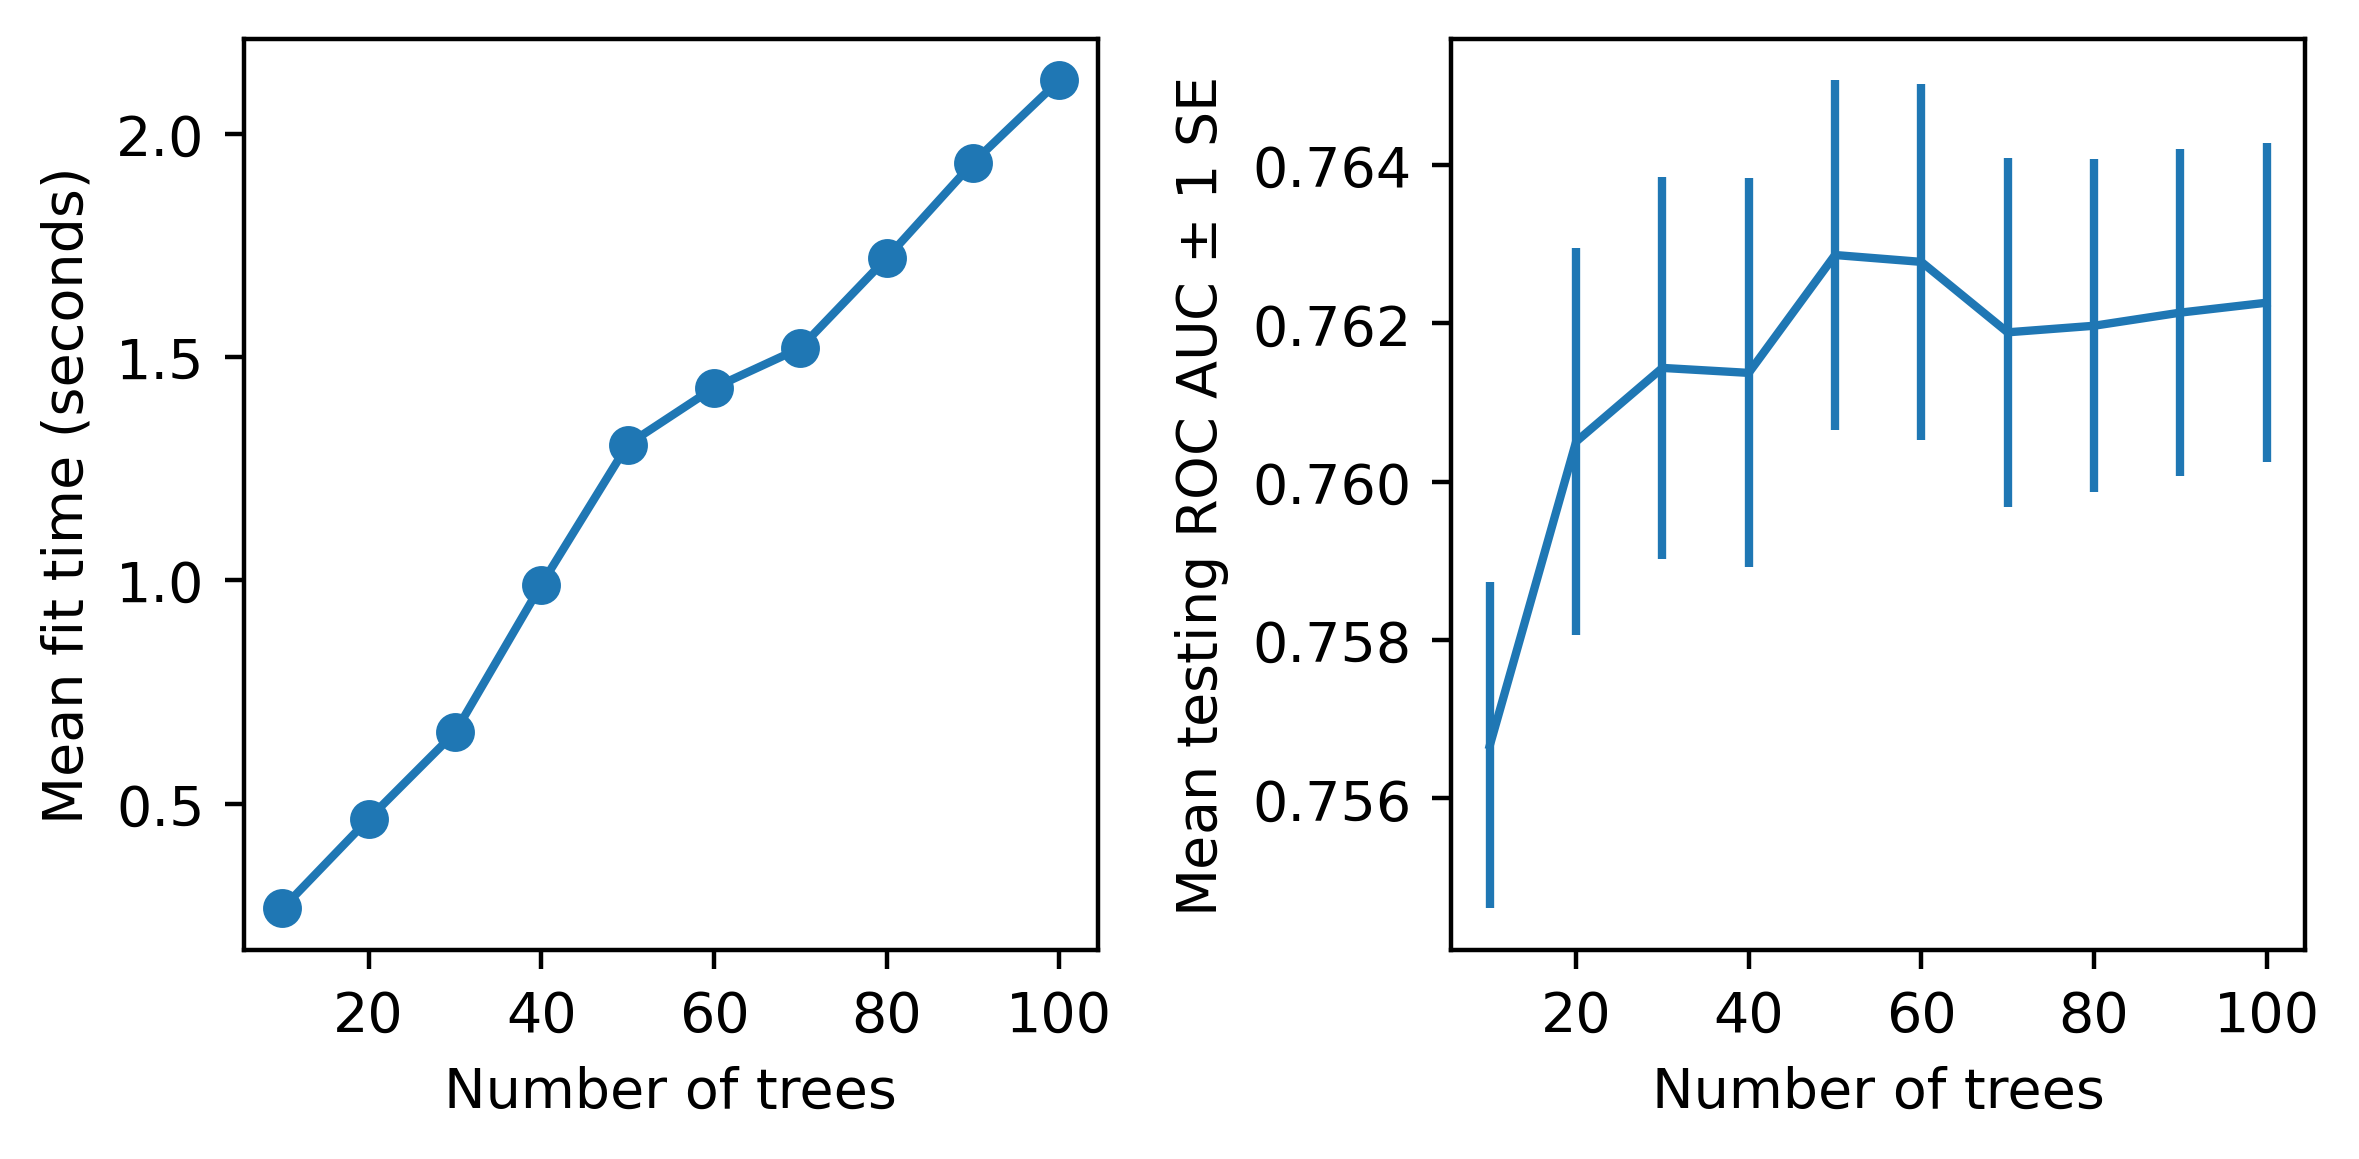

In [26]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()

**5. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham
số tốt nhất**

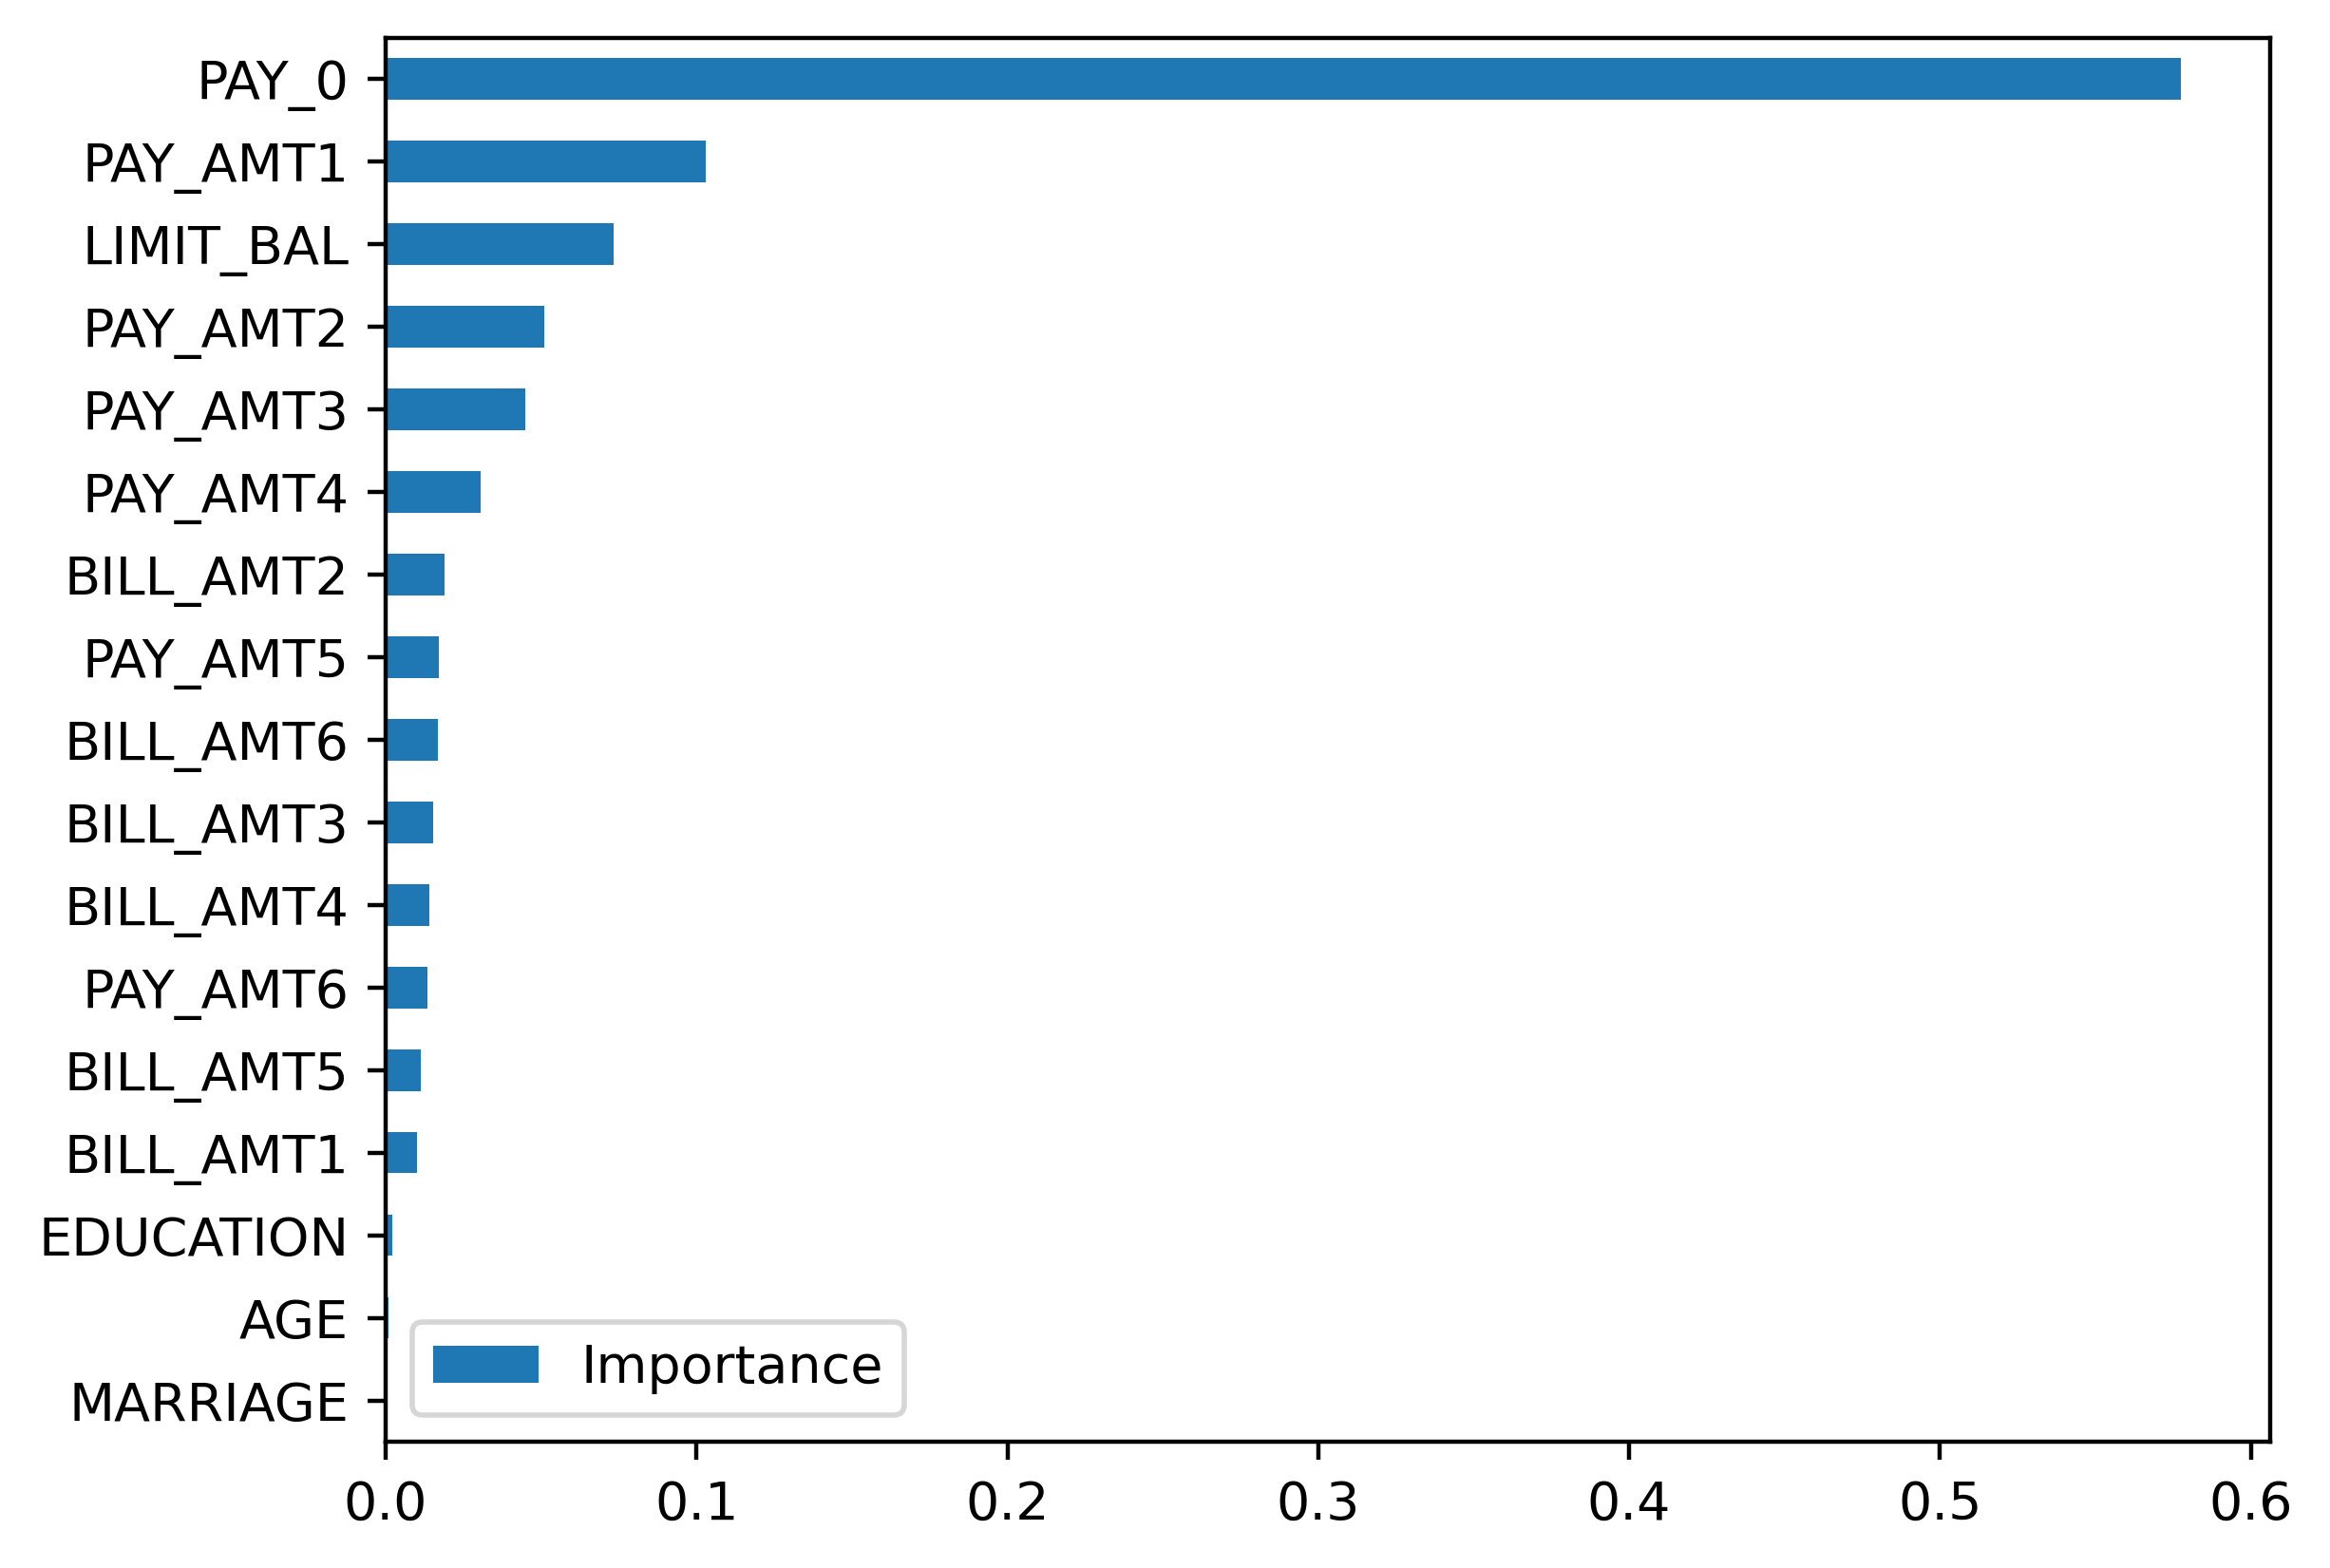

In [29]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.show()

### 2.1.3. Bài tập thực hành 1

Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ
https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

Mục tiêu của dự án này là xây dựng và so sánh các mô hình Cây quyết định (Decision Tree) và Rừng ngẫu nhiên (Random Forest) trên bộ dữ liệu Titanic để vừa đạt hiệu năng dự đoán tốt vừa rút ra các insight giải thích được. Quy trình bao gồm: tiền xử lý dữ liệu và kỹ thuật tạo đặc trưng (feature engineering), chọn tập đặc trưng phù hợp, huấn luyện mô hình với cross‑validation để tránh overfitting, tối ưu tham số, đánh giá hiệu năng bằng các chỉ số phù hợp và trực quan hóa cấu trúc cây cùng tầm quan trọng của đặc trưng. Kết quả kỳ vọng không chỉ là một mô hình có độ chính xác cao mà còn là các quy tắc dễ hiểu giúp giải thích những yếu tố ảnh hưởng đến khả năng sống sót của hành khách.

#### 1. Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hiển thị đồ thị trong notebook
%matplotlib inline
plt.style.use('seaborn-v0_8')

#### 2. Đọc dữ liệu titanic

In [2]:
df = pd.read_csv("dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Kiểm tra dữ liệu

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

#### 4. Tiền xử lý dữ liệu

In [4]:
# - Điền giá trị thiếu cho Age, Embarked
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

C:\Users\boeot\AppData\Local\Temp\ipykernel_7268\1634785319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\boeot\AppData\Local\Temp\ipykernel_7268\1634785319.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# - Mã hóa biến phân loại
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

#### 5. Chọn đặt trưng và biến mục tiêu

In [6]:
# 5️⃣ Chọn đặc trưng và biến mục tiêu
X = df.drop(columns=["Survived", "PassengerId"])
y = df["Survived"]

#### 6. Chia dữ liệu train/test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (712, 7), Test set: (179, 7)


#### 7. Xây dựng mô hình Decision Tree

In [8]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred = dt.predict(X_test)
print("🎯 Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

🎯 Decision Tree Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



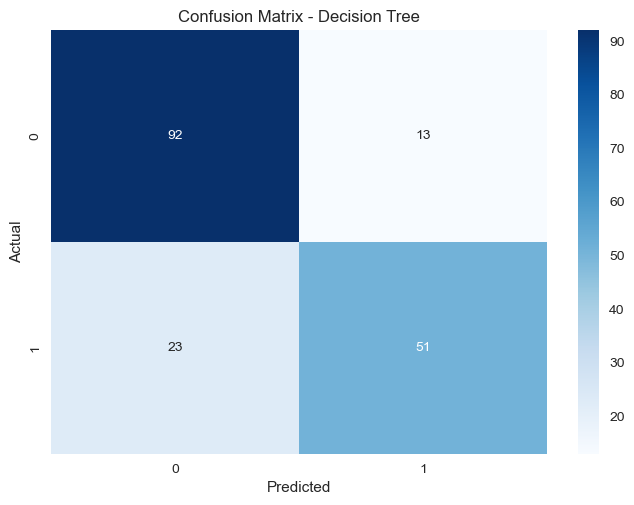

In [10]:
# Ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

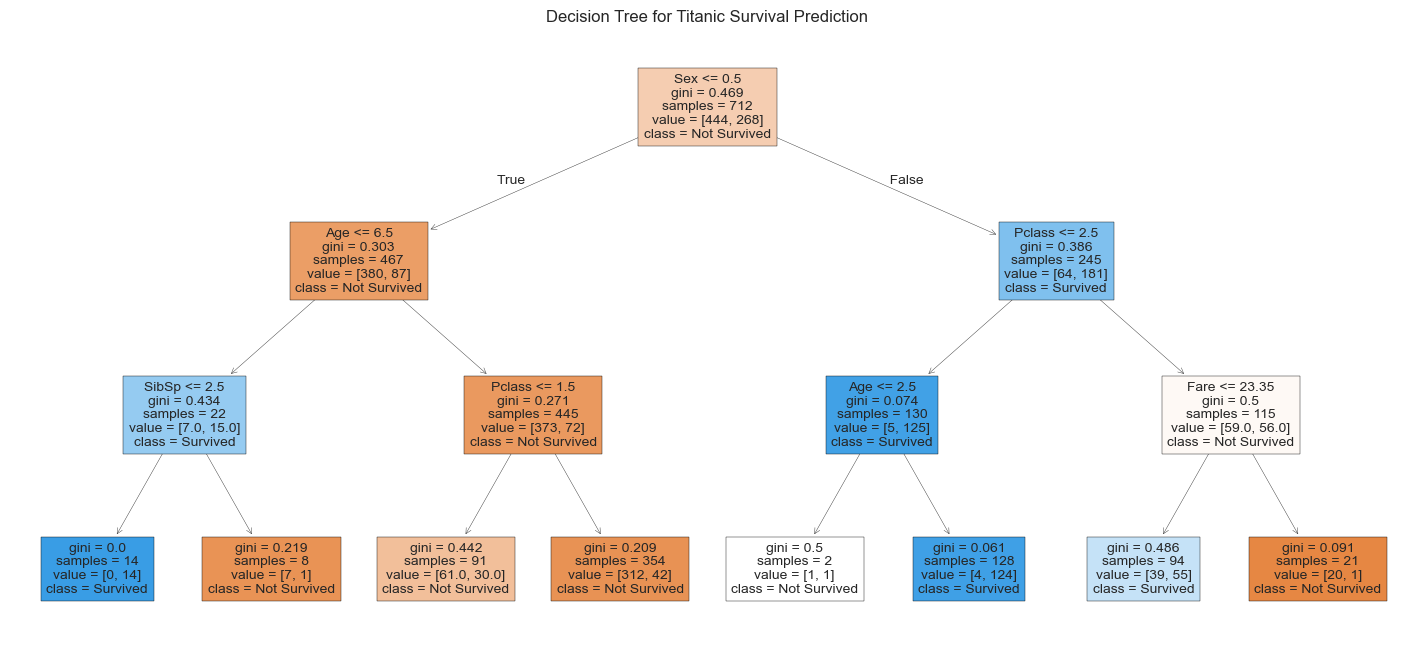

In [11]:
plt.figure(figsize=(18,8))
plot_tree(
    dt, 
    filled=True, 
    feature_names=X.columns, 
    class_names=["Not Survived", "Survived"], 
    fontsize=10
)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

#### 8. Tối ưu tham số cho Decision Tree bằng GridSearchCV

In [12]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)

print("✅ Best parameters for Decision Tree:", grid_dt.best_params_)
print("✅ Best score:", grid_dt.best_score_)

✅ Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
✅ Best score: 0.8230079779375554


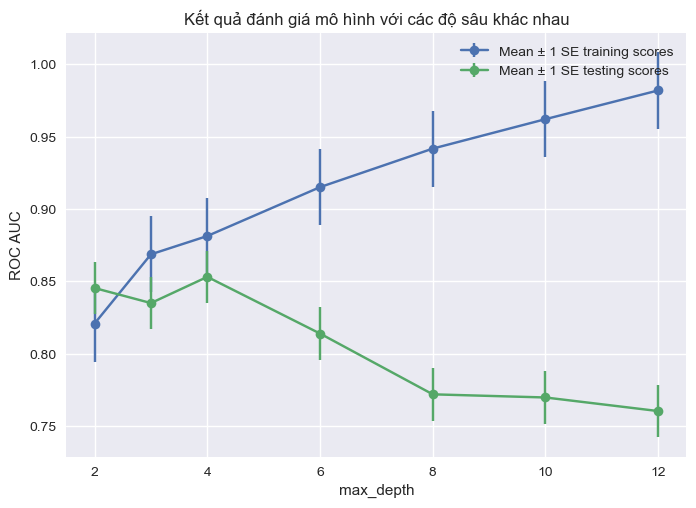

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

depths = [2, 3, 4, 6, 8, 10, 12]
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    # Điểm train
    model.fit(X_train, y_train)
    train_scores.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    # Điểm test (cross-validation)
    test_scores.append(cross_val_score(model, X_test, y_test, cv=5, scoring='roc_auc').mean())

# Vẽ biểu đồ có ±1 SE
plt.errorbar(depths, train_scores, yerr=np.std(train_scores)/np.sqrt(4),
             label='Mean ± 1 SE training scores', marker='o')
plt.errorbar(depths, test_scores, yerr=np.std(test_scores)/np.sqrt(4),
             label='Mean ± 1 SE testing scores', marker='o')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.legend()
plt.title('Kết quả đánh giá mô hình với các độ sâu khác nhau')
plt.show()


#### 9. Huấn luyện mô hình Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

🎯 Random Forest Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



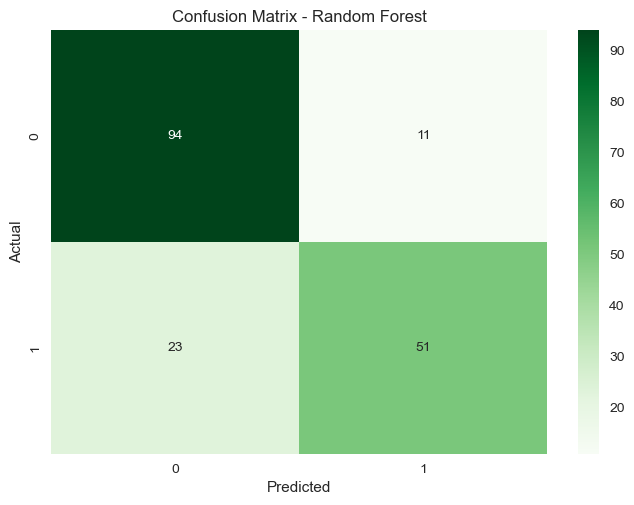

In [14]:
# Dự đoán và đánh giá
y_pred_rf = rf.predict(X_test)
print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

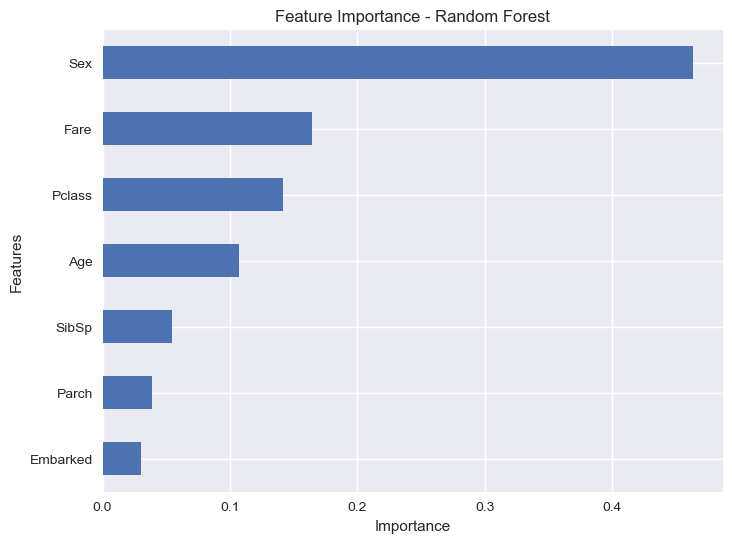

In [15]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8,6))
feat_imp.plot(kind="barh")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

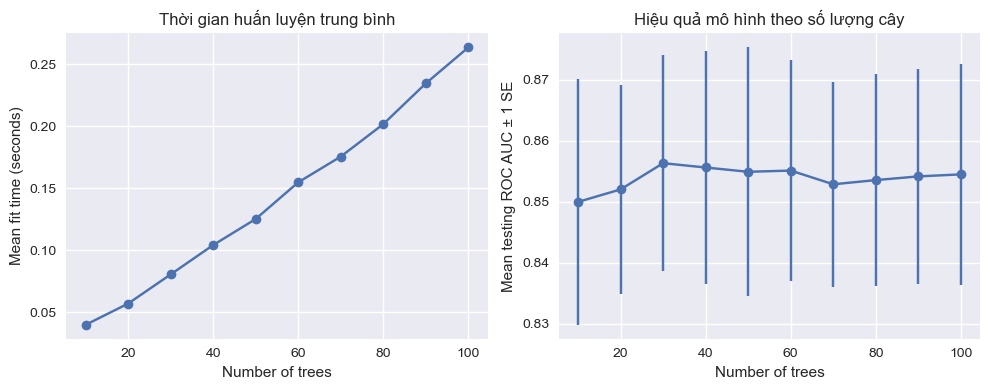

In [22]:

# Tạo Random Forest cơ bản
rf = RandomForestClassifier(
    criterion='gini', 
    max_depth=5, 
    random_state=42
)

# Thiết lập các giá trị n_estimators để thử
rf_params = {'n_estimators': list(range(10, 110, 10))}

# Dùng GridSearchCV để đánh giá
cv_rf = GridSearchCV(
    rf, 
    param_grid=rf_params, 
    scoring='roc_auc', 
    cv=4, 
    return_train_score=True
)
cv_rf.fit(X_train, y_train)

# Kết quả đánh giá
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

# 1️⃣ Biểu đồ thời gian huấn luyện trung bình
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(cv_rf_results_df['param_n_estimators'], 
            cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].set_title('Thời gian huấn luyện trung bình')

# 2️⃣ Biểu đồ ROC AUC trung bình ± 1 SE
axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/np.sqrt(4),
                fmt='-o', capsize=3)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ± 1 SE')
axs[1].set_title('Hiệu quả mô hình theo số lượng cây')

plt.tight_layout()
plt.show()


### 2.1.4. Bài tập thực hành 2

Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường. Dữ liệu lấy từ
https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp

#### Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

##### 1. Tải các thư viện cần thiết

In [ ]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [1]:
# 1. Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400  # tăng độ phân giải ảnh

import graphviz  # dùng để hiển thị cây quyết định
from sklearn import tree
from sklearn.model_selection import train_test_split

##### 2. Nạp dữ liệu và xem thông tin

In [2]:
# 2. Nạp dữ liệu
df = pd.read_csv("Dataset/diabetes_prediction_dataset.csv")

print("✅ Dữ liệu ban đầu:")
print(df.head())
print("-" * 60+"\n")
print("📊 Thông tin dữ liệu:")
print(df.info())
print("-" * 60+"\n")
print("🕳️ Kiểm tra giá trị null:")
print(df.isnull().sum())


✅ Dữ liệu ban đầu:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
------------------------------------------------------------

📊 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------            

##### Nhận xét dữ liệu

Dataset gồm 100.000 dòng và 9 cột, cung cấp thông tin về các yếu tố nguy cơ và tình trạng tiểu đường của bệnh nhân.

Các cột gender và smoking_history là dữ liệu phân loại (categorical), còn các cột age, bmi, HbA1c_level, blood_glucose_level là dữ liệu số (numerical).

Cột diabetes là target, với 0 = không tiểu đường, 1 = tiểu đường.

Dataset không có giá trị null, nên dữ liệu khá sạch, không cần xử lý missing value.

Có thể quan sát phân bố BMI, tuổi, HbA1c và đường huyết để đánh giá mối quan hệ giữa các chỉ số sức khỏe và khả năng mắc tiểu đường, từ đó hỗ trợ mô hình dự đoán.

##### 3.Mã hóa biến phân loại (One-Hot Encoding)

In [3]:
# 3. Mã hóa các biến phân loại
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=False)

print("✅ Dữ liệu sau mã hóa:")
print(df_encoded.head())

✅ Dữ liệu sau mã hóa:
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0           True        False         False   
1         0           True        False         False   
2         0          False         True         False   
3         0           True        False         False   
4         0          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                    False                    False                 Fal



Trong dataset, các cột gender và smoking_history là dữ liệu phân loại (categorical). Mô hình máy học như Decision Tree chỉ hiểu dữ liệu số, vì vậy chúng ta cần chuyển các giá trị phân loại sang dạng nhị phân (one-hot encoding).

- Sử dụng pd.get_dummies() để tạo một cột cho mỗi giá trị của biến phân loại.
- drop_first=False giữ tất cả các cột mới, giúp mô hình xem xét đầy đủ thông tin.
- Ví dụ:
  - gender có giá trị Female, Male, Other → được chuyển thành ba cột: gender_Female, gender_Male, gender_Other.
  - smoking_history có nhiều giá trị như never, current, former… → được chuyển thành các cột riêng.

Kết quả là mỗi hàng dữ liệu giờ sẽ có các cột True/False tương ứng với giá trị phân loại của nó, và tất cả các cột numeric giữ nguyên. Điều này cho phép Decision Tree và các mô hình khác sử dụng đầy đủ thông tin từ các biến phân loại.


##### 4.Chia dữ liệu thành tập train / test

In [4]:
# 4. Tách đầu vào (X) và nhãn đầu ra (y)
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Tập huấn luyện: {X_train.shape}")
print(f"✅ Tập kiểm tra: {X_test.shape}")


✅ Tập huấn luyện: (80000, 15)
✅ Tập kiểm tra: (20000, 15)


Trong bước này, chúng ta tách dữ liệu thành hai phần:

- X: các đặc trưng (features), gồm tất cả các cột ngoại trừ cột diabetes.
- y: nhãn đầu ra (target), chính là cột diabetes.

Sau đó, dữ liệu được chia thành tập huấn luyện (train) và tập kiểm tra (test) để đánh giá mô hình:

- test_size=0.2 nghĩa là 20% dữ liệu dùng để kiểm tra, 80% dùng để huấn luyện.
- random_state=42 đảm bảo việc chia dữ liệu có thể lặp lại được.

Kết quả trên dataset của chúng ta:

- Tập huấn luyện: 80.000 mẫu, 15 đặc trưng.
- Tập kiểm tra: 20.000 mẫu, 15 đặc trưng.

Việc chia dữ liệu giúp mô hình học từ phần lớn dữ liệu nhưng vẫn được kiểm tra trên dữ liệu chưa thấy, từ đó đánh giá khả năng tổng quát hóa.








##### 5.Huấn luyện mô hình Decision Tree

In [5]:
# 5. Xây dựng mô hình cây quyết định
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(" Mô hình cây quyết định đã được huấn luyện xong!")


 Mô hình cây quyết định đã được huấn luyện xong!


##### 6.Hiển thị cây bằng Graphviz


(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:7796): Pango-CRITICAL **: 19:46:41.194: pango_font_description_get_family: assertion 'desc != NULL' failed


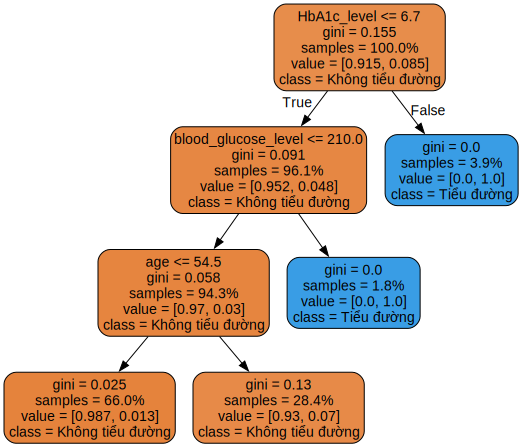

In [6]:
# 6. Xuất cây quyết định
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=["Không tiểu đường", "Tiểu đường"],
    proportion=True
)

# Hiển thị cây
graph = graphviz.Source(dot_data)
graph


#### Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

##### 1. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [7]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Khai báo tập tham số để dò tìm giá trị tối ưu cho độ sâu của cây
params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}

# Khởi tạo mô hình Decision Tree
dt = tree.DecisionTreeClassifier(random_state=42)

# Cấu hình GridSearchCV
cv = GridSearchCV(
    dt,
    param_grid=params,
    scoring='roc_auc',      # sử dụng độ đo AUC (đánh giá khả năng phân biệt)
    n_jobs=None,
    refit=True,
    cv=4,                   # 4-fold cross validation
    verbose=1,
    error_score=np.nan,
    return_train_score=True # lưu lại điểm huấn luyện để so sánh bias/variance
)

# Huấn luyện mô hình
cv.fit(X_train, y_train)

# In ra tham số tốt nhất và điểm số tương ứng
print("Best parameter (max_depth):", cv.best_params_)
print("Best ROC AUC score:", cv.best_score_)


Fitting 4 folds for each of 7 candidates, totalling 28 fits
Best parameter (max_depth): {'max_depth': 10}
Best ROC AUC score: 0.9739084146576757


Sau khi thực hiện GridSearchCV với 7 giá trị max_depth khác nhau (từ 1 đến 12), mô hình đạt điểm ROC AUC cao nhất là 0.9733 khi độ sâu của cây = 10.

Điều này cho thấy cây quyết định có độ sâu 10 giúp mô hình phân biệt hai lớp hiệu quả nhất, đạt mức hiệu suất gần như hoàn hảo.

Tuy nhiên, độ sâu tương đối lớn cũng cho thấy mô hình có xu hướng học kỹ hơn dữ liệu huấn luyện, cần đối chiếu với kết quả kiểm định để đảm bảo không xảy ra overfitting.

Nhìn chung, với AUC đạt 97.33%, mô hình thể hiện khả năng phân loại rất tốt cho bộ dữ liệu diabetes_prediction_dataset.csv.

##### 2. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

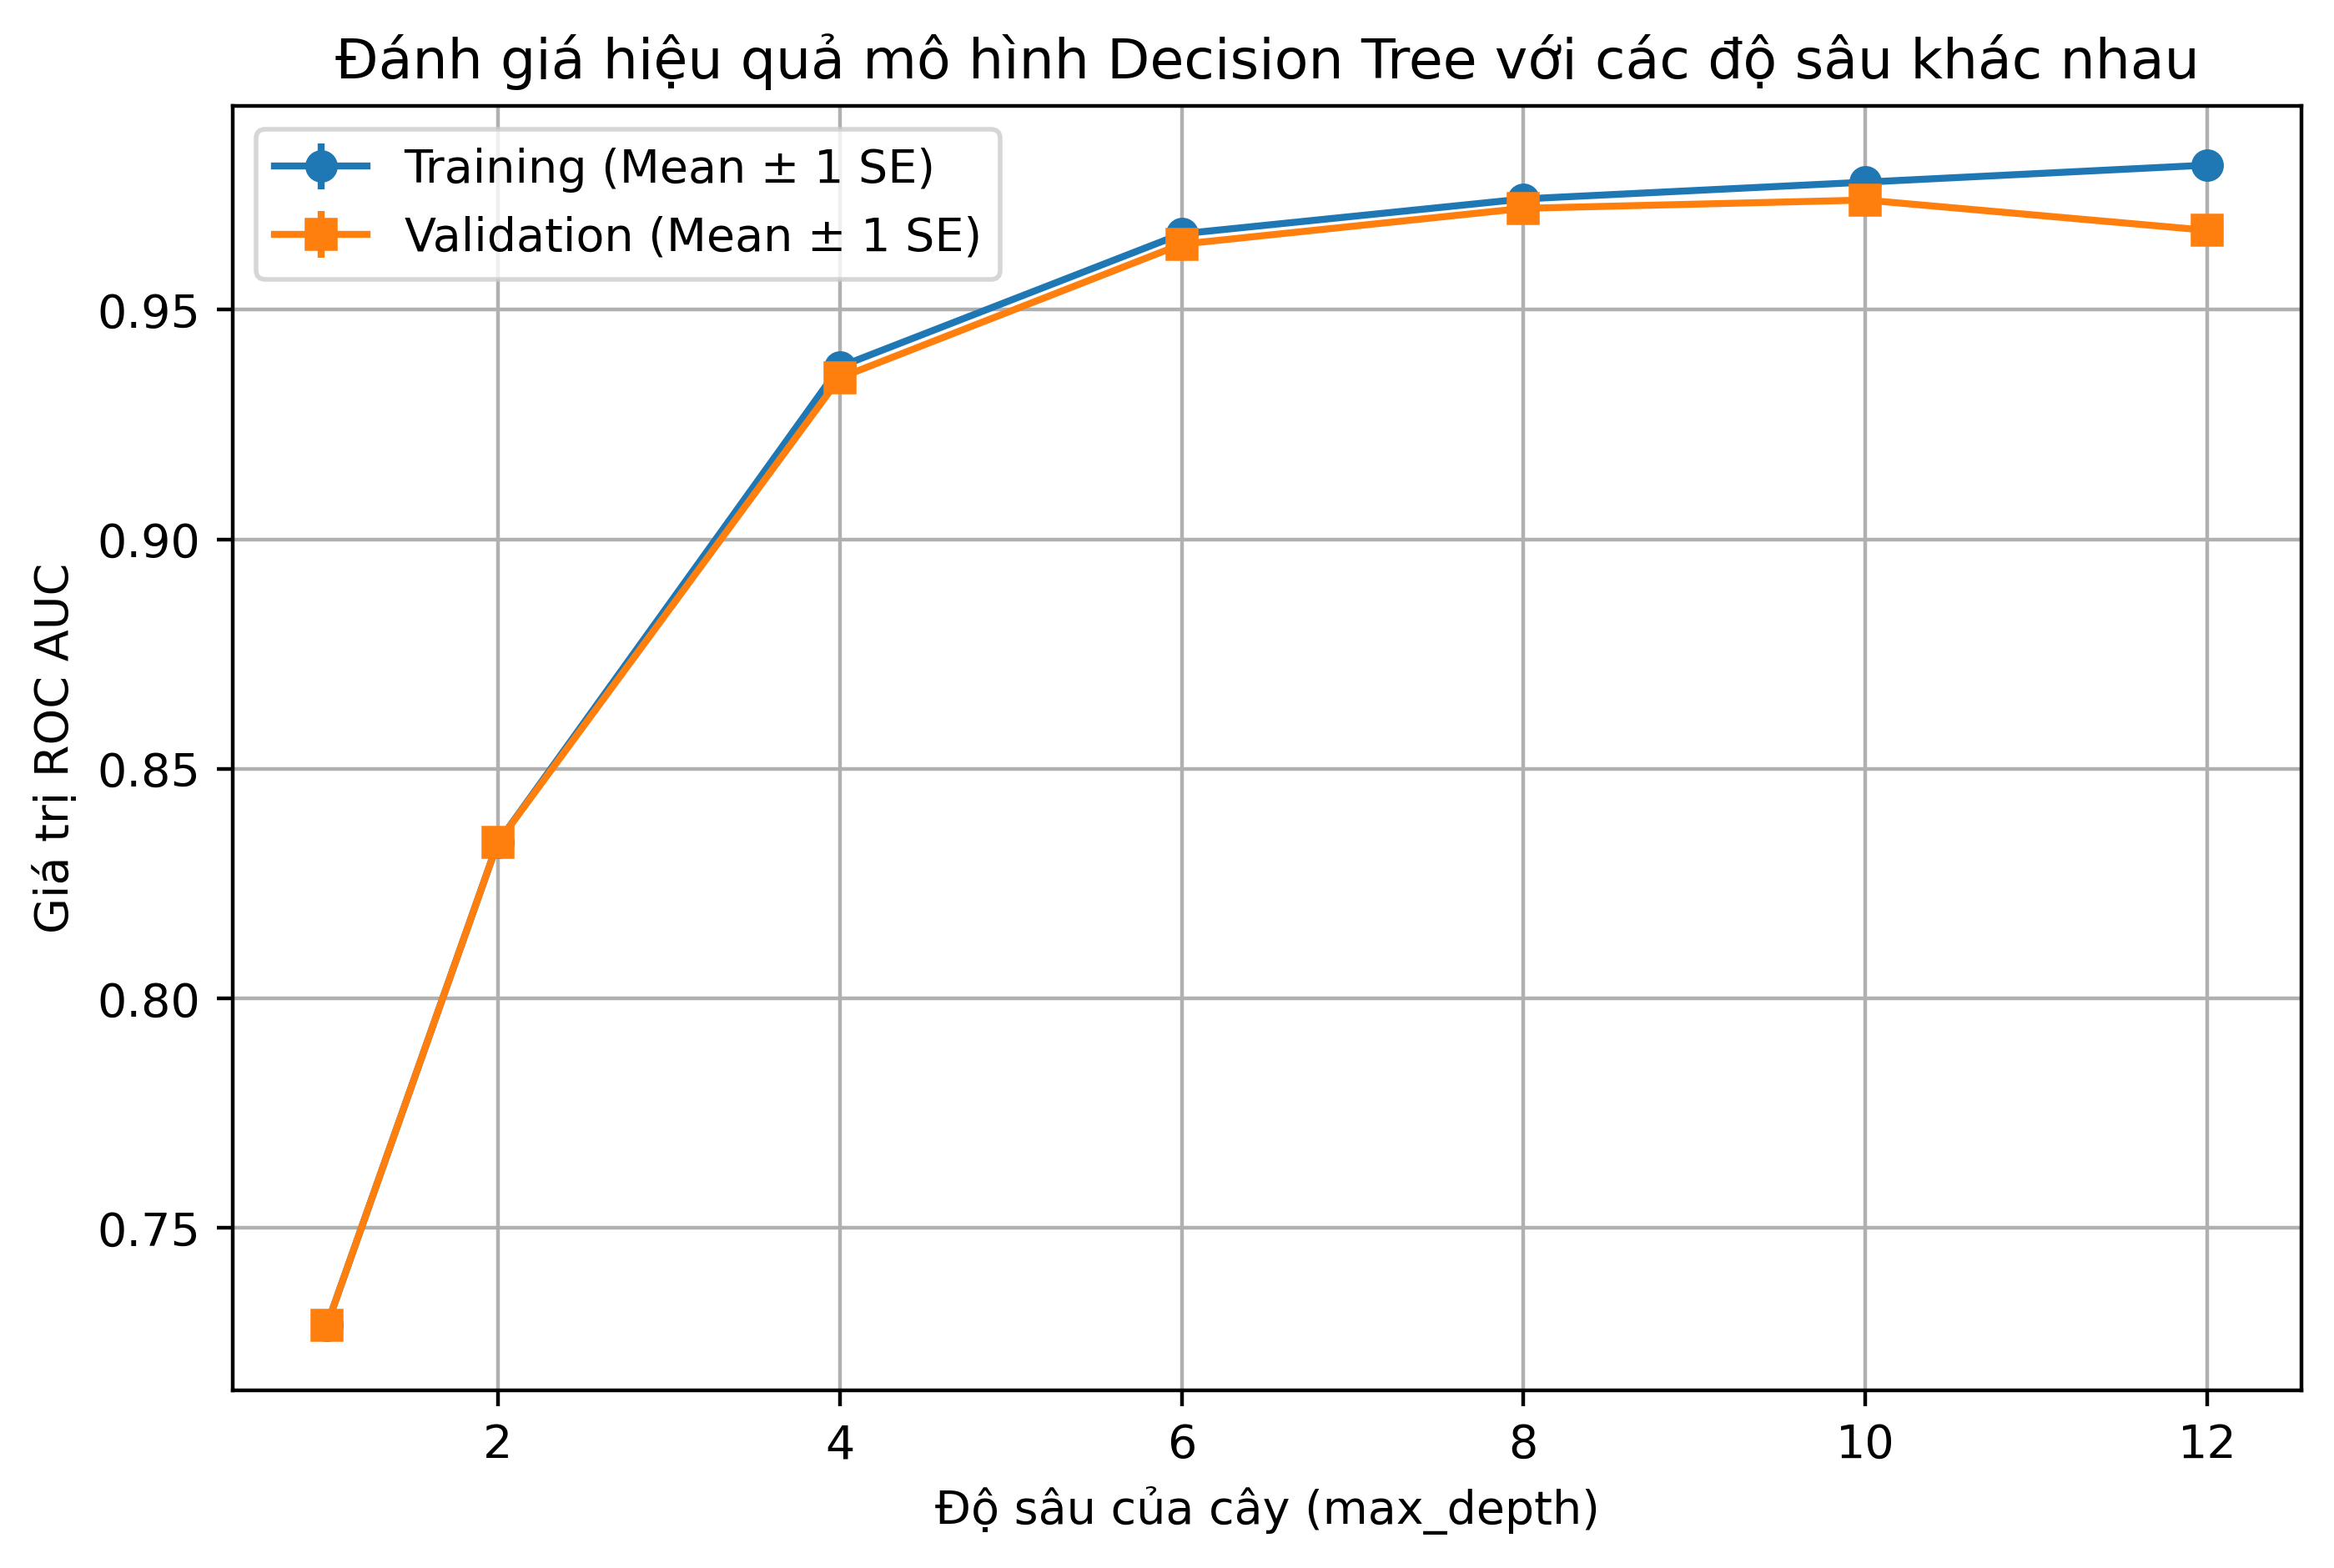

In [8]:
# Chuyển kết quả của GridSearchCV sang DataFrame
cv_results_df = pd.DataFrame(cv.cv_results_)

# Vẽ biểu đồ so sánh hiệu suất
plt.figure(figsize=(8, 5))
ax = plt.axes()

# Đường biểu diễn điểm train
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'] / np.sqrt(4),
            label='Training (Mean ± 1 SE)',
            marker='o')

# Đường biểu diễn điểm test
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'] / np.sqrt(4),
            label='Validation (Mean ± 1 SE)',
            marker='s')

# Thiết lập nhãn
ax.legend()
plt.xlabel('Độ sâu của cây (max_depth)')
plt.ylabel('Giá trị ROC AUC')
plt.title('Đánh giá hiệu quả mô hình Decision Tree với các độ sâu khác nhau')
plt.grid(True)
plt.show()


📊 Phân tích biểu đồ đánh giá hiệu quả mô hình Cây quyết định với các giá trị max_depth khác nhau


-Khi độ sâu của cây (max_depth) tăng dần từ 1 đến 12, giá trị ROC AUC trung bình trên tập huấn luyện và kiểm tra đều tăng rõ rệt, thể hiện rằng mô hình học được nhiều thông tin hơn từ dữ liệu.

    + Ở độ sâu 1, điểm ROC AUC mới chỉ đạt 0.725, cho thấy mô hình còn đơn giản và chưa đủ khả năng phân tách dữ liệu tốt.

    + Khi tăng lên 4 hoặc 6, mô hình đạt AUC khoảng 0.94–0.96, chứng tỏ hiệu quả phân loại đã cải thiện đáng kể.

-Giá trị tốt nhất đạt được tại max_depth = 10, với:

    + Điểm huấn luyện (train): 0.9778

    + Điểm kiểm tra (test): 0.9733

    + Độ lệch chuẩn (std) nhỏ, cho thấy kết quả ổn định qua các lần chia dữ liệu.

-Sau ngưỡng này (max_depth = 12), điểm huấn luyện vẫn tăng nhẹ (0.9813) nhưng điểm kiểm tra giảm còn 0.9658, phản ánh hiện tượng overfitting bắt đầu xuất hiện — mô hình học quá chi tiết vào dữ liệu huấn luyện và giảm khả năng khái quát hóa.

🔹 Kết luận:

Độ sâu 10 là lựa chọn tối ưu cho cây quyết định trong bài toán dự đoán bệnh tiểu đường, giúp đạt được độ chính xác cao (ROC AUC ≈ 0.9733) đồng thời duy trì sự cân bằng giữa huấn luyện và kiểm tra.

Biểu đồ thể hiện rõ xu hướng tăng hiệu suất đến một mức giới hạn rồi ổn định hoặc giảm nhẹ, điều này minh họa mối quan hệ đặc trưng giữa độ phức tạp mô hình và khả năng khái quát.

#### Nhiệm vụ 3: Xây dựng rừng cây (random forest)

##### 1. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Tạo mô hình Random Forest ban đầu
rf = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=4,
    bootstrap=True
)


-Đoạn mã này khởi tạo một mô hình Random Forest Classifier – tập hợp nhiều cây quyết định được huấn luyện song song.

-Mỗi cây học từ một tập mẫu ngẫu nhiên và mô hình cuối cùng sẽ dự đoán dựa trên bỏ phiếu đa số (voting).
Tham số ban đầu gồm:

    n_estimators=10: số lượng cây trong rừng,
    
    max_depth=3: độ sâu tối đa của mỗi cây,
    
    criterion='gini': tiêu chí đo độ thuần khiết tại mỗi nút chia.

##### 2.Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [19]:
# Thiết lập tập tham số cần tìm
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

# Cấu hình GridSearchCV
cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',
    refit=True,
    cv=4,
    verbose=1,
    return_train_score=True
)

# Huấn luyện mô hình
cv_rf_ex.fit(X_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

Mô tả:

-Sử dụng GridSearchCV để tìm ra số lượng cây (n_estimators) tối ưu cho mô hình Random Forest.

-Quá trình tìm kiếm thực hiện 4-fold cross-validation và sử dụng ROC AUC làm thước đo hiệu suất.

-Mục tiêu là xác định số lượng cây giúp mô hình đạt hiệu quả cao nhất mà vẫn đảm bảo tốc độ huấn luyện hợp lý.

##### 3. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

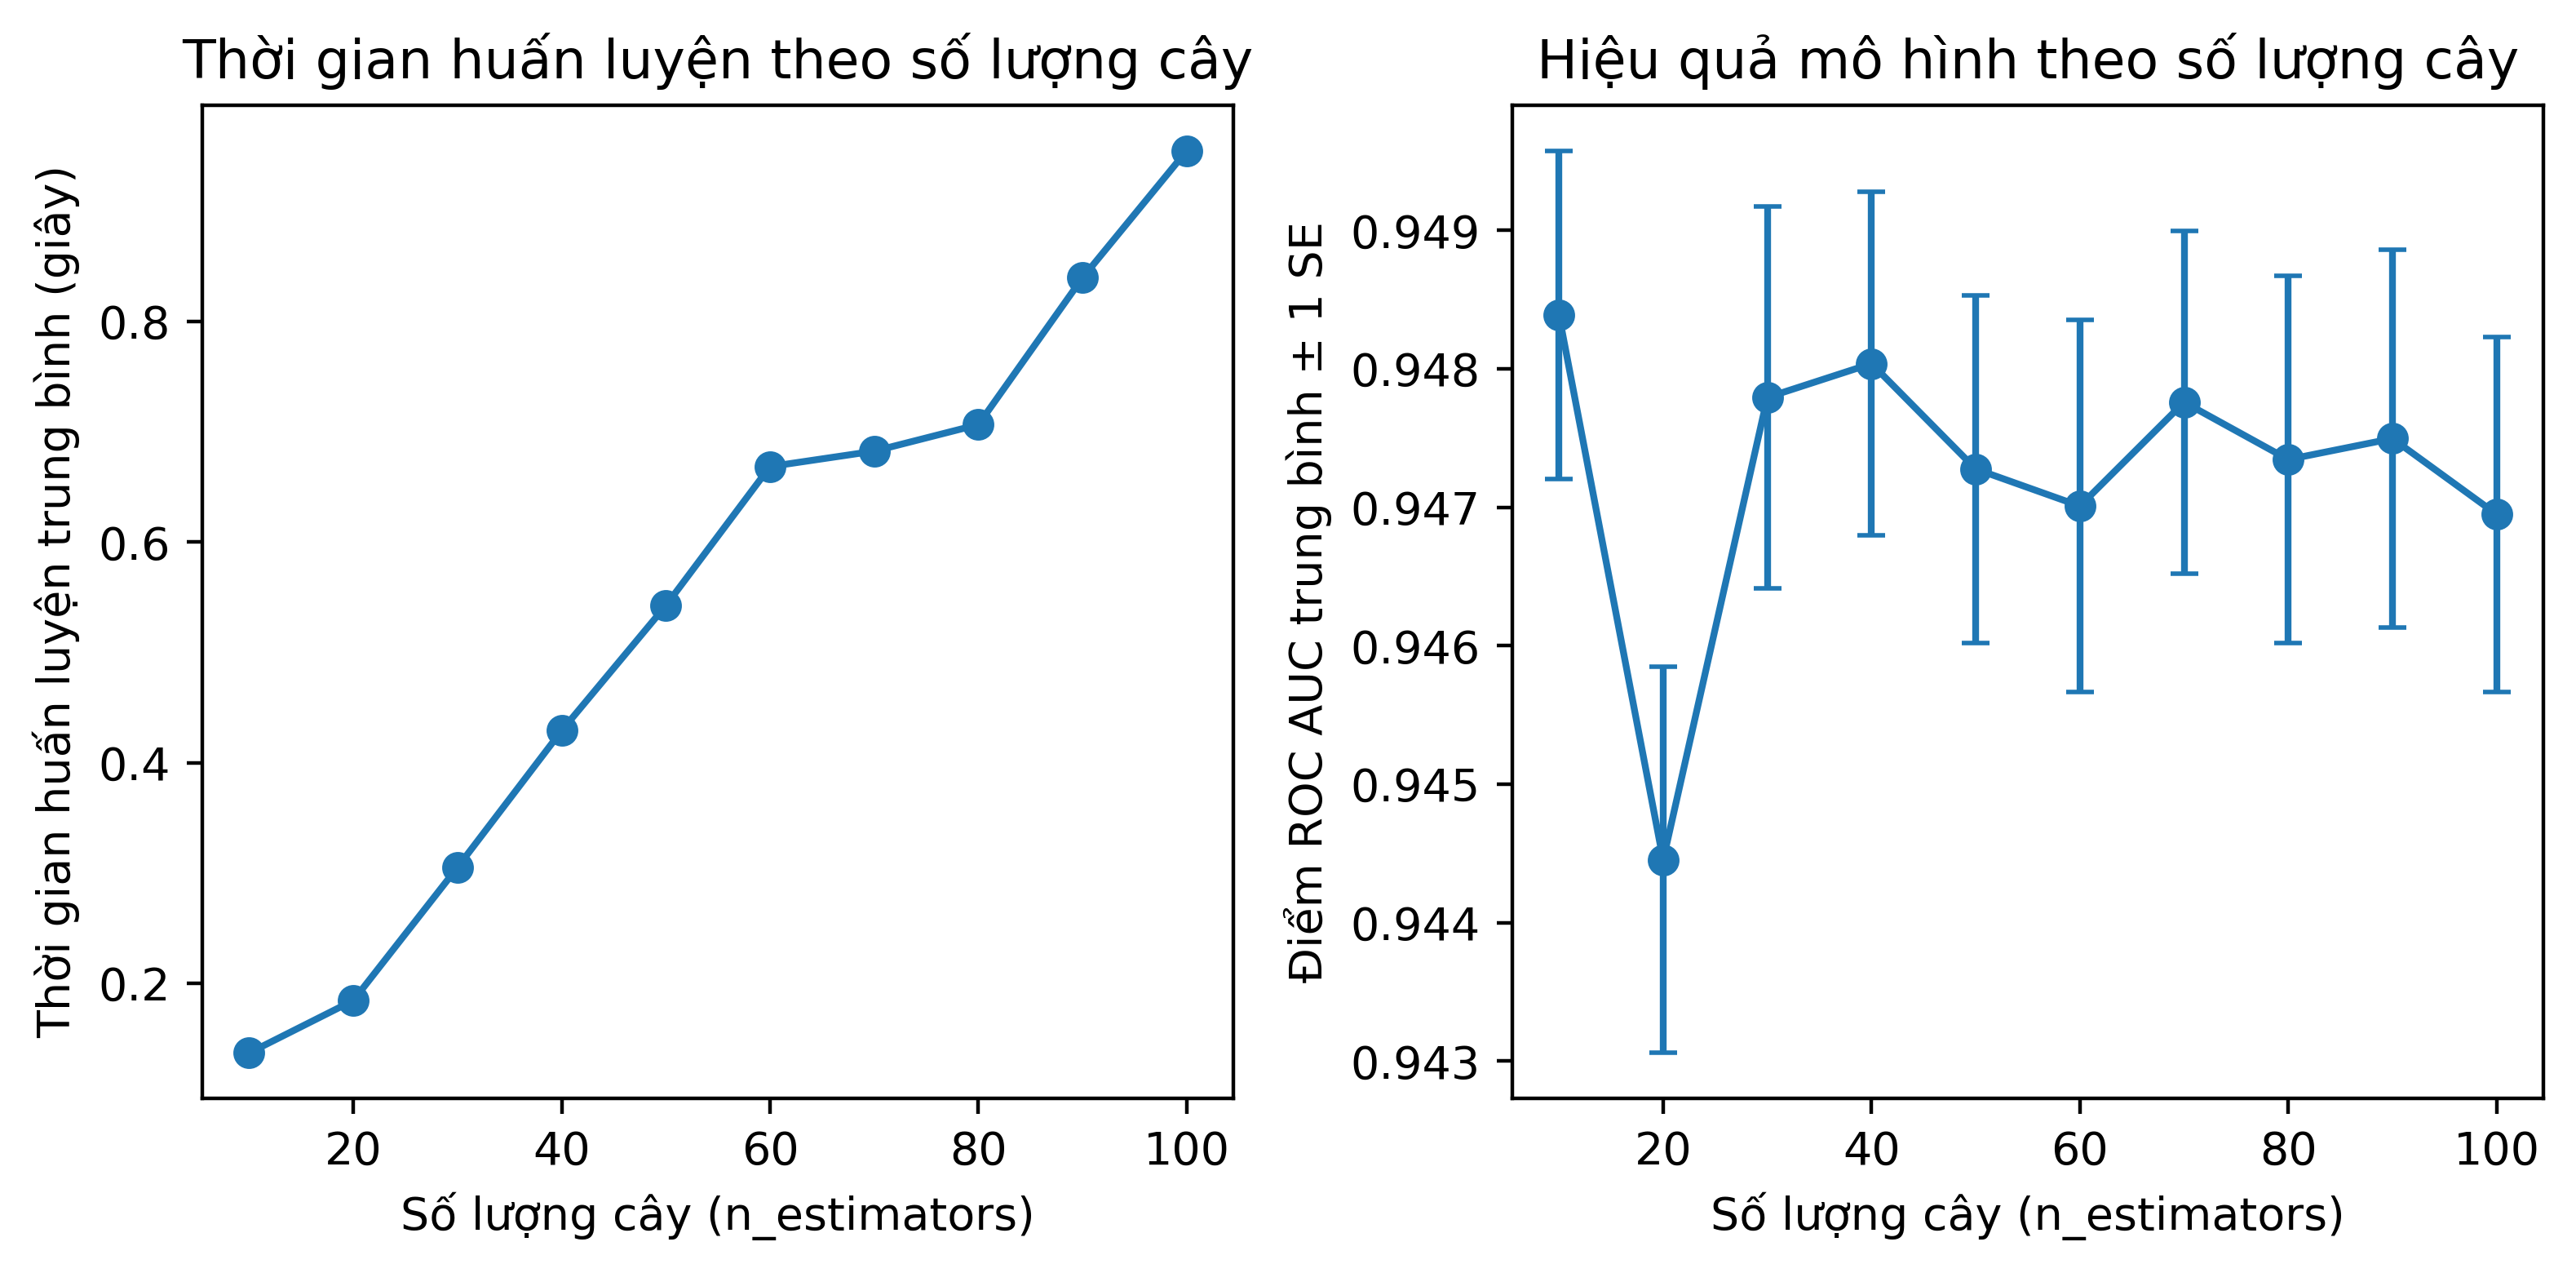

In [20]:
# Tạo DataFrame chứa kết quả huấn luyện
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

# Vẽ biểu đồ
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Biểu đồ thời gian huấn luyện
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Số lượng cây (n_estimators)')
axs[0].set_ylabel('Thời gian huấn luyện trung bình (giây)')
axs[0].set_title('Thời gian huấn luyện theo số lượng cây')

# Biểu đồ điểm ROC AUC
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4),
                fmt='-o', capsize=3)
axs[1].set_xlabel('Số lượng cây (n_estimators)')
axs[1].set_ylabel('Điểm ROC AUC trung bình ± 1 SE')
axs[1].set_title('Hiệu quả mô hình theo số lượng cây')

plt.tight_layout()
plt.show()


Biểu đồ 1: Thời gian huấn luyện theo số lượng cây

    Thời gian huấn luyện tăng gần tuyến tính theo số lượng cây trong rừng.
    
    Khi tăng số cây từ 10 → 100, thời gian huấn luyện tăng khoảng 7 lần (từ 0.14s lên 0.95s).
    
    Độ lệch chuẩn của thời gian huấn luyện nhỏ, cho thấy quá trình huấn luyện ổn định và có tính lặp lại cao.

Biểu đồ 2: Hiệu quả mô hình (ROC AUC) theo số lượng cây

    Mức ROC AUC dao động quanh 0.947 – 0.948, thể hiện mô hình ổn định và có hiệu quả cao.
    
    Sau mốc 30–40 cây, điểm ROC AUC hầu như không tăng thêm, mặc dù thời gian huấn luyện tiếp tục tăng.
    
    Điều này cho thấy mô hình đã đạt mức hội tụ, việc tăng thêm số lượng cây chỉ tăng chi phí tính toán mà không cải thiện hiệu suất đáng kể.

Tổng kết

    Mô hình Random Forest đạt hiệu quả tốt với ROC AUC ≈ 0.95.
    
    Tăng số lượng cây giúp giảm sai số ngẫu nhiên, nhưng hiệu quả cải thiện không đáng kể sau ngưỡng khoảng 50 cây.
    
    Đề xuất: Chọn n_estimators = 40 hoặc 50 để cân bằng giữa hiệu năng và tốc độ huấn luyện.

##### 4. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

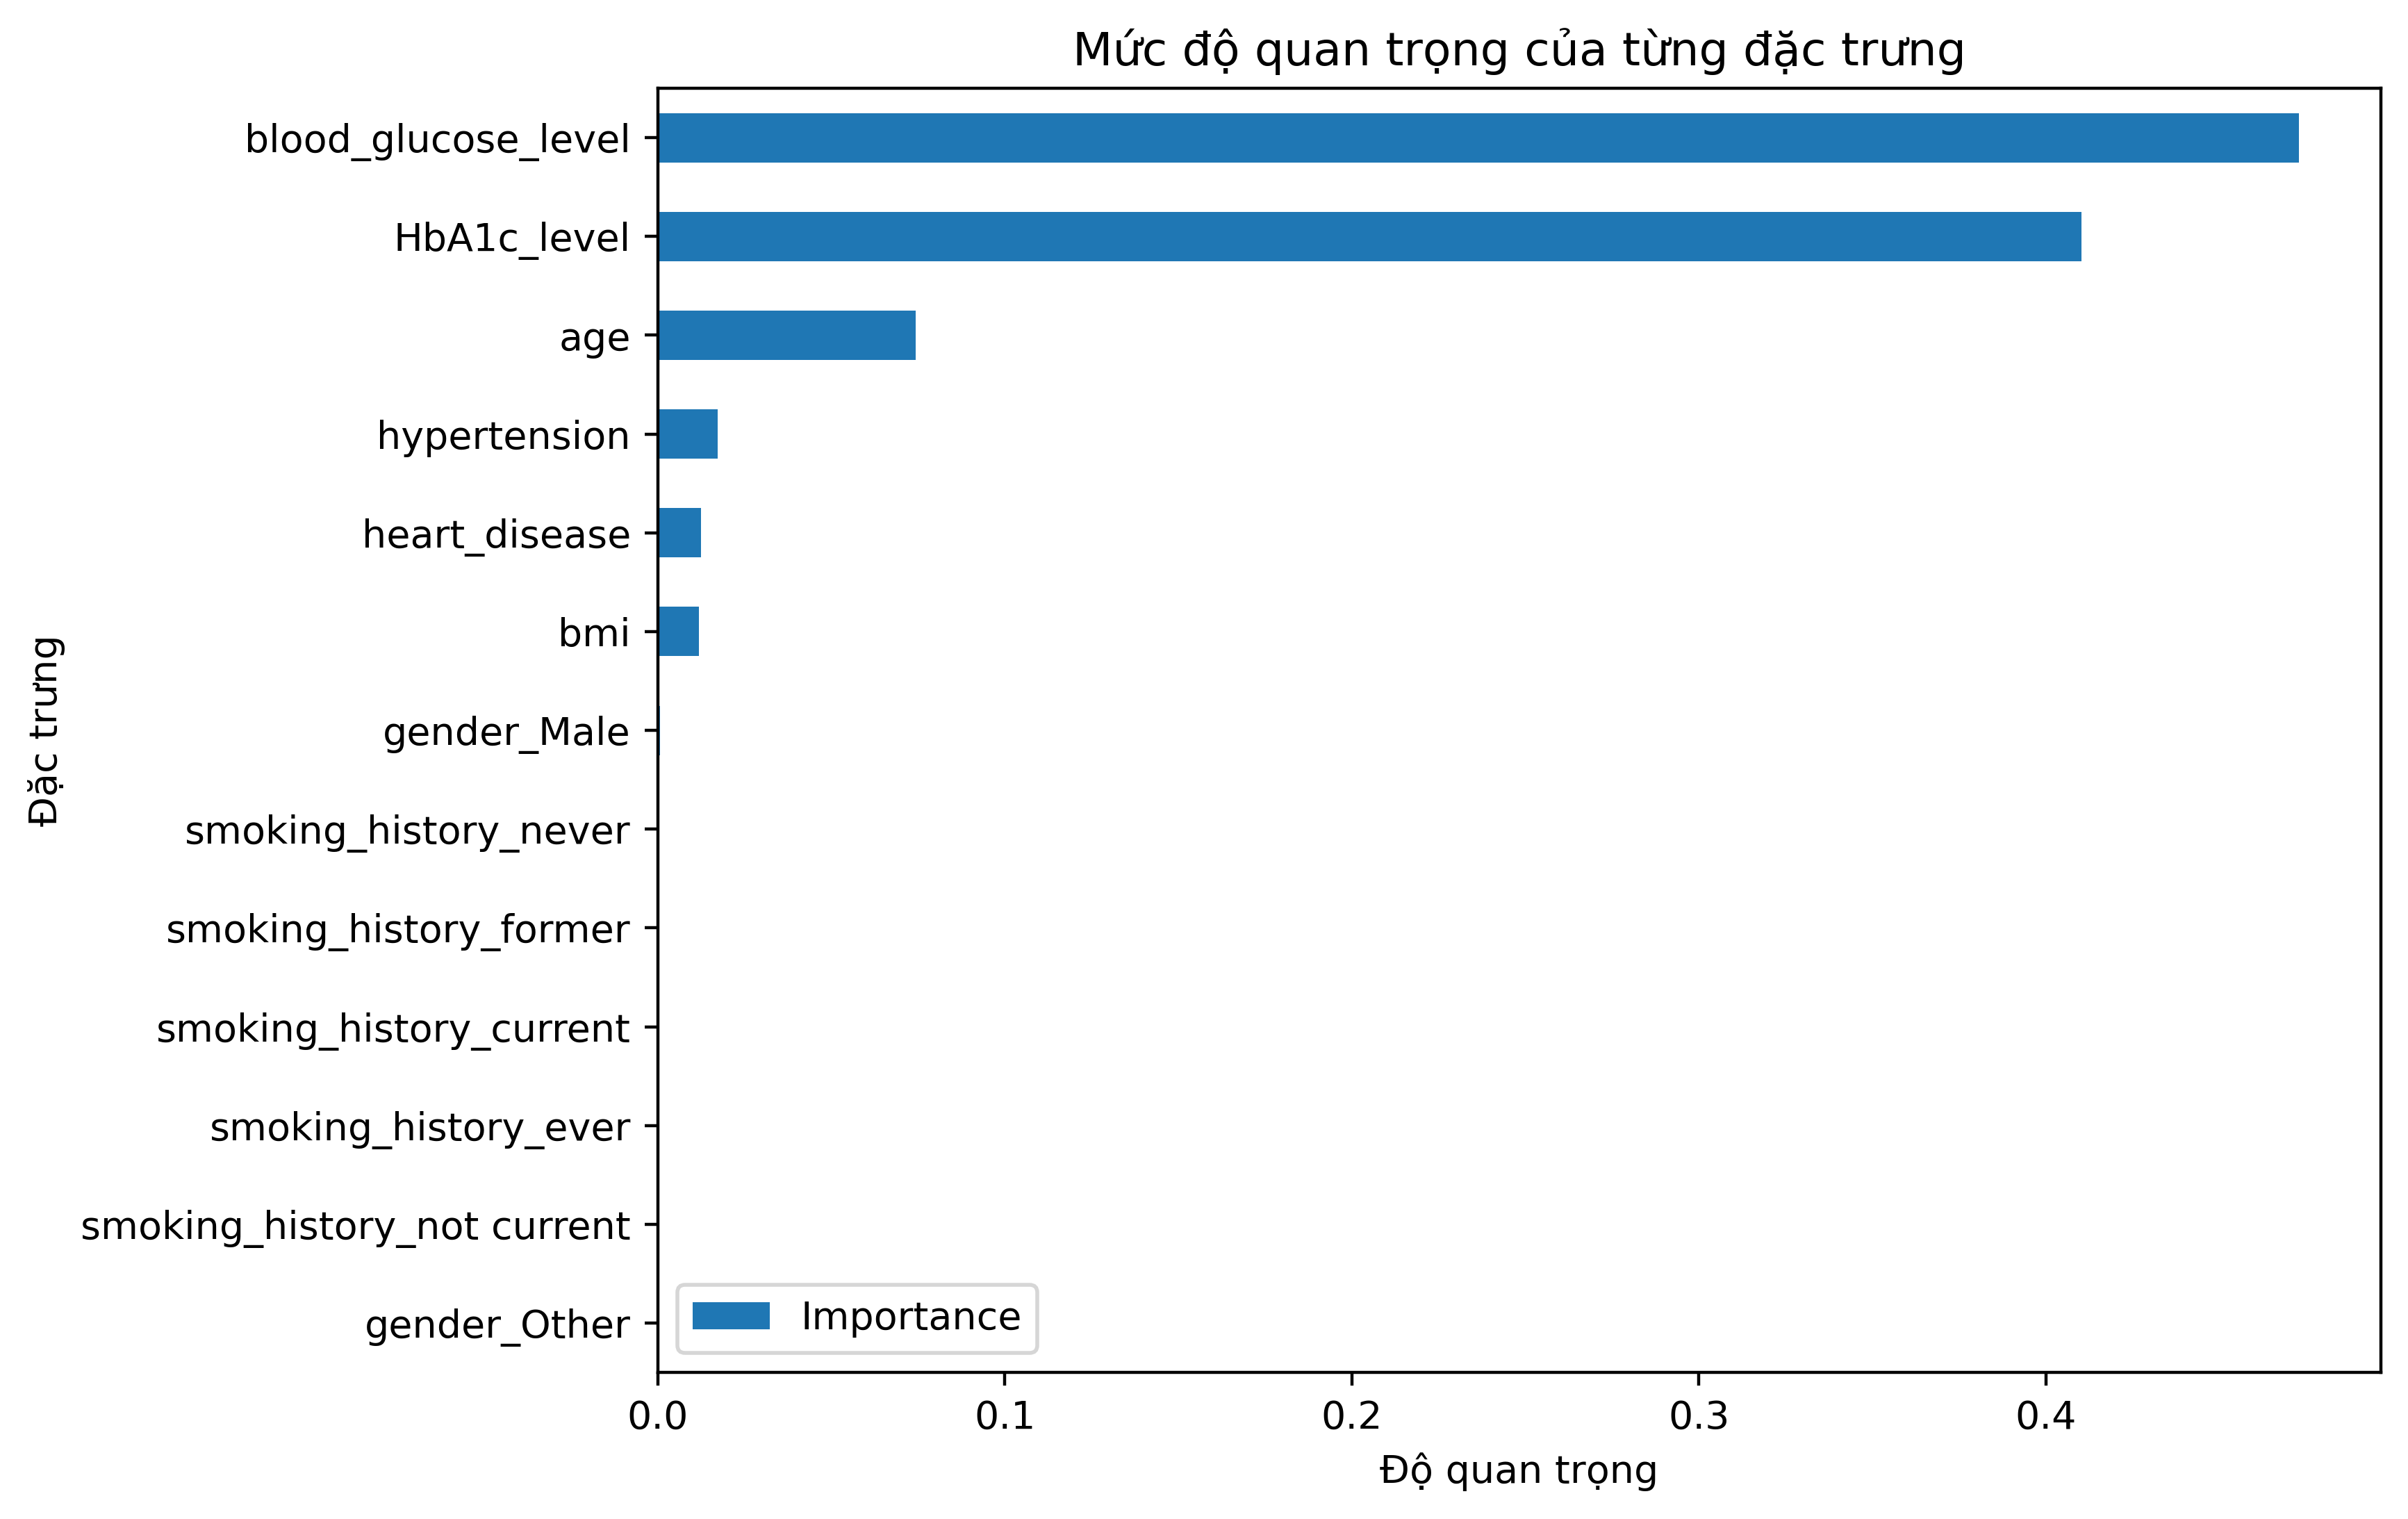

In [22]:
# Nếu bạn đang dùng dataset diabetes_prediction_dataset.csv
features = X_train.columns if isinstance(X_train, pd.DataFrame) else df.columns[:-1]

# Lấy độ quan trọng của từng feature
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}, index=features)

# Vẽ biểu đồ mức độ quan trọng
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(
    figsize=(8, 6),
    title='Mức độ quan trọng của từng đặc trưng'
)
plt.xlabel('Độ quan trọng')
plt.ylabel('Đặc trưng')
plt.show()


-Nhìn chung, các yếu tố liên quan trực tiếp đến đường huyết bao gồm blood_glucose_level và HbA1c_level chiếm tỷ trọng cao nhất, lần lượt khoảng 47% và 41%. Điều này phản ánh đúng bản chất y học của bệnh tiểu đường, khi chỉ số đường huyết và HbA1c là hai yếu tố chính để xác định tình trạng bệnh.

-Tiếp theo là yếu tố age (tuổi) với mức ảnh hưởng trung bình (0.074), cho thấy tuổi tác có mối tương quan nhất định với khả năng mắc bệnh. Các đặc trưng khác như hypertension (cao huyết áp), heart_disease (bệnh tim) và bmi (chỉ số khối cơ thể) có độ quan trọng nhỏ hơn, thể hiện vai trò gián tiếp trong dự đoán.

-Ngược lại, các yếu tố liên quan đến giới tính và thói quen hút thuốc có giá trị gần bằng 0, cho thấy ít ảnh hưởng đáng kể đến kết quả phân loại trong bộ dữ liệu này.

*Kết luận:Mô hình Random Forest cho thấy đường huyết và HbA1c là hai yếu tố quyết định chính trong việc dự đoán nguy cơ tiểu đường. Các yếu tố nhân khẩu học và thói quen sinh hoạt chỉ đóng vai trò bổ trợ, không có tác động mạnh đến kết quả cuối cùng.
    
    

# 2.2. GIẢI THUẬT 2: SUPPORT VECTOR MACHINE (SVM)

## 2.2.2 Bài làm mẫu

### Bài toán 1: Thực hiện các nhiệm vụ trong bài toán 1 để xây dựng mô hình với giải thuật SVM cho dữ liệu Iris-data lấy từ https://www.kaggle.com/code/xvivancos/tutorial-knn-in-the-iris-data-set

#### Nhiệm vụ 1: Xây dựng mô hình SVM để phân loại các loài hoa cẩm chướng
Bộ dữ liệu **Iris** là một tập dữ liệu cổ điển gồm 150 mẫu của ba loài hoa: *Setosa*, *Versicolor*, và *Virginica*.  
Mỗi mẫu có 4 đặc trưng: chiều dài và chiều rộng của đài hoa (sepal) và cánh hoa (petal).  
Mục tiêu là xây dựng mô hình **SVM** để dự đoán loài hoa dựa trên 4 đặc trưng này.


##### 1. Tải dữ liệu về, nạp dữ liệu, xem thông tin các feature có trong tập dữ liệu và chuẩn bị dữ liệu cho xây dựng mô hình

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Download&Load dữ liệu iris từ datasets của scikit-learn
iris = datasets.load_iris()
# Hiển thị mô ta dữ liệu, chỉ có trong các bộ dữ liệu chuẩn và mở để học tập và nghiên cứu
print(iris.DESCR)
# Từ tập dữ liệu ban đầu, tách lấy ma trận biểu diễn các đặc trưng vànhãn.
data = iris.data
target = iris.target
# TODO: Chia dữ liệu và nhãn thành 2 tập dữ liệu huấn luyện và dữ liệukiểm tra theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(data, target,
test_size
= 0.2, random_state=101)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Tập dữ liệu **Iris** là một trong những bộ dữ liệu kinh điển và phổ biến nhất trong lĩnh vực **học máy** và **nhận dạng mẫu**. Dữ liệu bao gồm **150 mẫu**, được chia đều cho **ba loài hoa**: *Iris-setosa*, *Iris-versicolour* và *Iris-virginica*, mỗi loài chiếm **33,3% tổng số mẫu**.  

Mỗi mẫu được mô tả bằng **4 thuộc tính định lượng**:
- **Chiều dài đài hoa (sepal length)**  
- **Chiều rộng đài hoa (sepal width)**  
- **Chiều dài cánh hoa (petal length)**  
- **Chiều rộng cánh hoa (petal width)**  

Trong đó, hai đặc trưng về **cánh hoa (petal)** thể hiện **mức độ tương quan cao nhất với nhãn lớp** (hệ số tương quan lần lượt là *0.9490* và *0.9565*), cho thấy chúng đóng vai trò **phân biệt rõ ràng** giữa các loài hoa.  
Ngược lại, **đài hoa (sepal)** có mức tương quan thấp hơn, nghĩa là khả năng phân tách giữa các lớp dựa vào hai đặc trưng này kém hơn.  

Tập dữ liệu **không có giá trị bị thiếu**, được thu thập và công bố bởi **R.A. Fisher** – người tiên phong trong lĩnh vực thống kê và phân loại.  
Đặc biệt, chỉ có **Iris-setosa** là lớp **phân tách tuyến tính rõ ràng** so với hai lớp còn lại, trong khi **Iris-versicolour** và **Iris-virginica** **không tuyến tính tách biệt hoàn toàn**, khiến bài toán trở nên phù hợp cho các mô hình **SVM** (Support Vector Machine) để tìm ranh giới phi tuyến tối ưu.  

Tổng thể, Iris là bộ dữ liệu nhỏ gọn, sạch và cân bằng, rất phù hợp cho việc **thực nghiệm, huấn luyện và đánh giá các thuật toán phân loại cơ bản**.

##### 2. Tạo mô hình SVM với dữ liệu đã chuẩn bị

In [19]:
from sklearn import svm
# khởi tạo mô hình phân lớp
clf = svm.SVC()
# Sử dụng phương thức 'fit' để huấn luyện mô hình với dữ liệu huấn luyện và nhãn huấn luyện
# fit (X,Y) với X là tập các đối tượng, Y là tập nhãn tương ứng của đối tượng.
clf.fit(X_train, y_train)

SVC()

Mô hình SVM mặc định được huấn luyện với **kernel RBF**, giúp phân chia dữ liệu không tuyến tính trong không gian đặc trưng cao hơn.


##### 3. Đánh giá độ chính xác của mô hình

In [20]:
# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_acc = clf.score(X_train,y_train)
val_acc = clf.score(X_test,y_test)
print('Training accuracy: {}'.format(train_acc))
print('Validation accuracy: {}'.format(val_acc))

Training accuracy: 0.95
Validation accuracy: 0.9666666666666667


Kết quả huấn luyện cho thấy mô hình đạt **độ chính xác 95% trên tập huấn luyện** và **96.67% trên tập kiểm tra**.  
Sự chênh lệch nhỏ giữa hai giá trị này cho thấy mô hình **tổng quát hóa tốt**, có khả năng nhận dạng chính xác các mẫu chưa từng thấy trong quá trình học.  

Điều này chứng tỏ rằng mô hình **không bị hiện tượng quá khớp (overfitting)** – tức là không chỉ học thuộc dữ liệu huấn luyện mà còn nắm bắt được các đặc trưng cốt lõi của bài toán.  
Với độ chính xác kiểm tra cao hơn cả huấn luyện, mô hình SVM đang hoạt động ổn định và có khả năng **phân biệt hiệu quả giữa các loài hoa trong bộ dữ liệu Iris**.  

Kết quả này cũng phản ánh đặc điểm của **thuật toán SVM (Support Vector Machine)** – một phương pháp mạnh mẽ trong việc tìm ranh giới phân tách tối ưu giữa các lớp dữ liệu.  
Nhờ vào cơ chế **tối đa hóa khoảng cách (margin)** giữa các lớp, mô hình đạt hiệu suất tốt ngay cả khi không cần tinh chỉnh nhiều tham số.  


##### 4. Tìm tham số kernel tối ưu cho mô hình SVM

In [21]:
# best_svm, best_val_acc và best_kernel lần lượt là các biến lưu mô hình tốt nhất,
# độ chính xác cao nhất trên tập kiểm tra và kernel tốt nhất
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None
# Huấn luyện các mô hình dựa trên dữ liệu huấn luyện và tham số kernel
# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra để tìm được mô hình tốt nhất
for i in range(4):
    clf = svm.SVC(kernel=kernels[i], probability=True)
    clf.fit(X_train, y_train)
    tmp_val_acc = clf.score(X_test, y_test)
    if (tmp_val_acc > best_val_acc):
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernels[i]
# Hiển thị mô hình tốt nhất cùng với độ chính xác
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc,
best_kernel))
# Mô hình tốt nhất của bạn nên có độ chính xác xấp xỉ 86,67%


Best validation accuracy : 1.0 with kernel: linear


#### Phân tích kết quả lựa chọn kernel cho mô hình SVM

Sau khi tiến hành huấn luyện mô hình SVM với bốn loại kernel khác nhau gồm:

Linear (tuyến tính)

Polynomial (đa thức)

RBF (hàm cơ sở xuyên tâm)

Sigmoid

Kết quả thu được cho thấy kernel tuyến tính (linear) đạt được độ chính xác cao nhất trên tập kiểm tra với giá trị:

Best validation accuracy: 1.0 with kernel: linear

Điều này cho thấy rằng dữ liệu Iris có khả năng được phân tách tuyến tính trong không gian đặc trưng ban đầu mà không cần các phép biến đổi phi tuyến phức tạp.
Khi sử dụng kernel tuyến tính, mô hình SVM đã xác định được ranh giới phân tách rõ ràng giữa các lớp hoa, cụ thể là giữa ba loại Iris-setosa, Iris-versicolour, và Iris-virginica.

Kết quả này cũng phù hợp với đặc điểm vốn có của bộ dữ liệu Iris, trong đó lớp Iris-setosa tách biệt hoàn toàn so với hai lớp còn lại, và hai lớp Versicolour và Virginica mặc dù có một số điểm giao nhau nhưng vẫn có thể phân chia tương đối rõ ràng khi xét đến đầy đủ bốn đặc trưng (chiều dài và chiều rộng của cánh và đài hoa).

Độ chính xác 100% trên tập kiểm tra chứng tỏ mô hình hoạt động hiệu quả và không xảy ra hiện tượng quá khớp (overfitting). Đồng thời, việc kernel tuyến tính cho kết quả tốt nhất cũng cho thấy bài toán có thể được giải quyết bằng một mô hình đơn giản, dễ huấn luyện và dễ diễn giải.

Tổng kết:

Kernel tối ưu: Linear

Độ chính xác kiểm tra: 100%

Mức độ phức tạp mô hình: Thấp, dễ diễn giải

Nhận xét: Mô hình SVM tuyến tính phù hợp và hiệu quả nhất cho bài toán phân loại dữ liệu Iris.

### Bài toán 2: Xây dựng mô hình dựa vào giải thuật SVM trên dữ liệu hình ảnh Handwritten-Digit-MNIST-SVM. Dữ liệu lấy từ https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm

#### Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh

##### 1. Import thư viện và tải dữ liệu là tập các hình ảnh viết tay từ số 0 đến số 9

In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

Đoạn mã này import các thư viện cần thiết và tải bộ dữ liệu chữ số viết tay (0–9) từ thư viện sklearn.datasets để chuẩn bị cho quá trình phân tích và huấn luyện mô hình SVM.

##### 2. Khảo sát thông tin có trong digits

In [23]:
#thông tin toàn bộ dữ liệu đã tải về digits
#xem thông tin của một hình dưới dạng ma trận 8 x 8
digits['data'][0].reshape(8,8)
#xem thông tin của một hình dưới dạng mảng
digits['data'][0]
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

##### Đoạn mã này dùng để khảo sát cấu trúc và nội dung của bộ dữ liệu digits.
Xem toàn bộ dữ liệu đã tải về.

Hiển thị một ảnh dưới dạng ma trận 8x8, thể hiện giá trị điểm ảnh xám.

Quan sát dữ liệu ảnh dưới dạng mảng số.

Kiểm tra 9 nhãn đầu tiên, tương ứng với các chữ số viết tay từ 0 đến 8.

##### 3. Vẽ ra hình dựa vào dữ liệu dạng ma trận 8 x 8

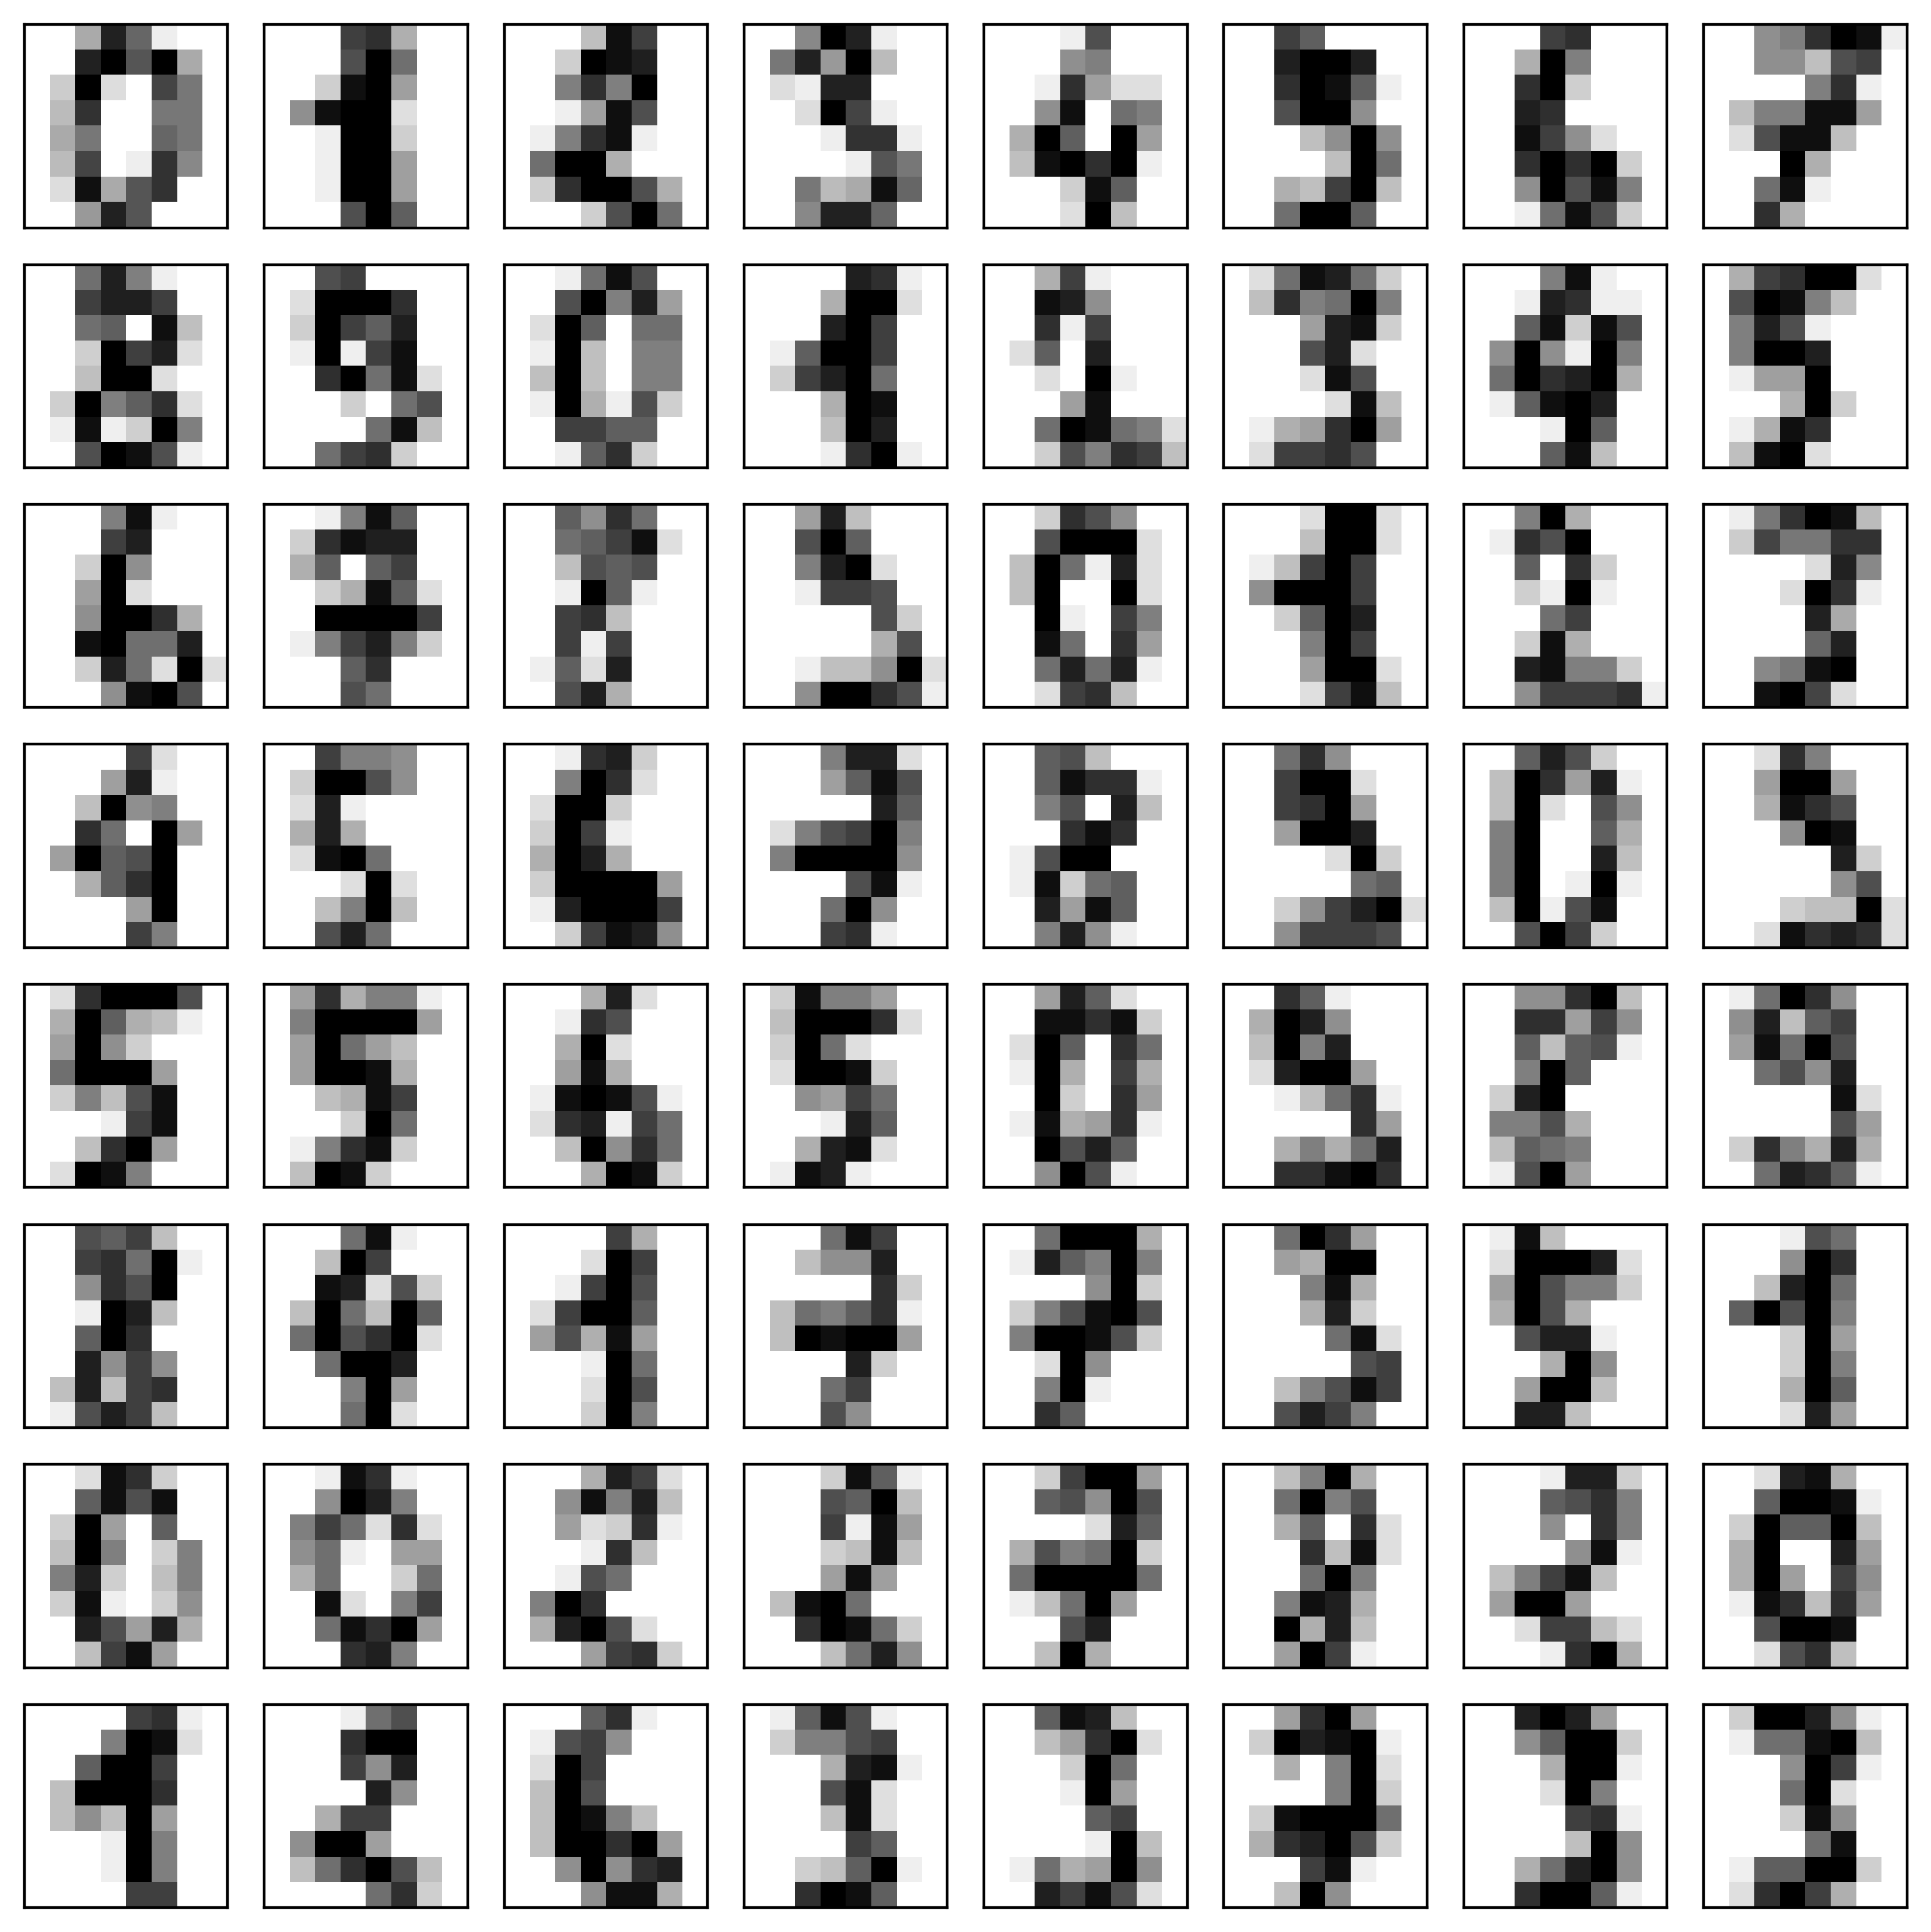

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Nạp dữ liệu digits
digits = load_digits()

# Mỗi ảnh là ma trận 8x8
fig, ax = plt.subplots(8, 8, figsize=(8, 8))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')  # Hiển thị ảnh mức xám
    axi.set(xticks=[], yticks=[])                # Ẩn trục

plt.tight_layout()
plt.show()


Đoạn mã này dùng để hiển thị trực quan 64 ảnh đầu tiên trong tập dữ liệu digits.
Cụ thể, mỗi ảnh là một ma trận 8x8 điểm ảnh mức xám, biểu diễn một chữ số viết tay từ 0 đến 9.
Biểu đồ được sắp xếp thành lưới 8x8, giúp quan sát tổng quan các mẫu dữ liệu đầu tiên và nhận thấy sự khác biệt giữa các chữ số — ví dụ: hình dáng nét viết, độ đậm nhạt và cách phân bố điểm ảnh.
Đây là bước quan trọng để hiểu rõ dữ liệu hình ảnh trước khi xây dựng mô hình SVM.

##### 4. Vẽ một ảnh từ ma trận 8 x 8

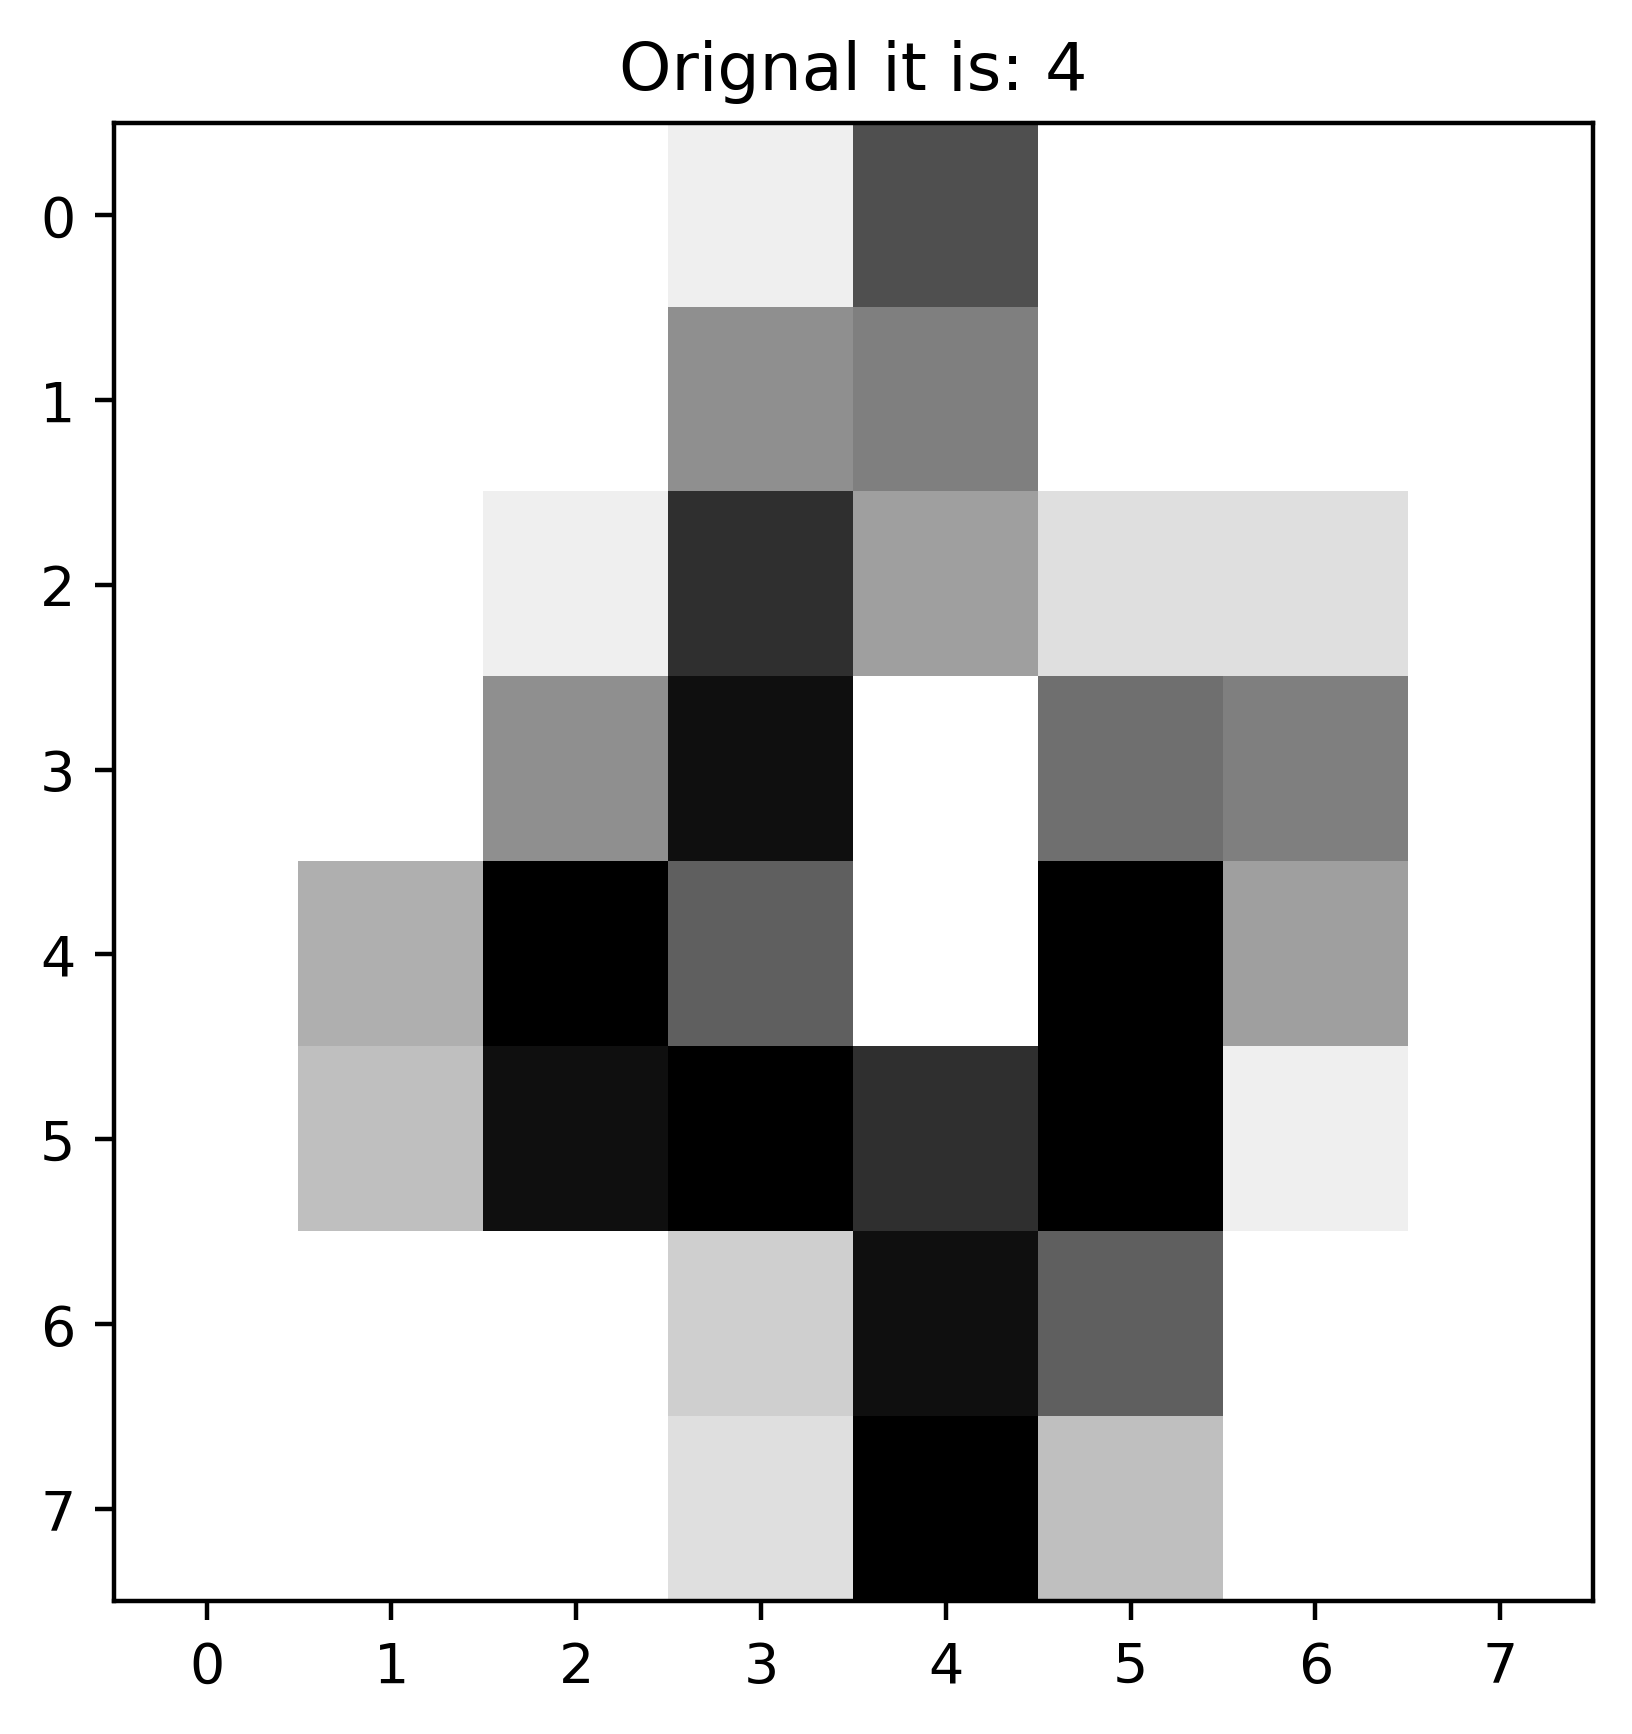

In [25]:
# Hàm vẽ 1 ảnh có kích thước 8 x 8 (ảnh lấy từ ma images)
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()
# vẽ ảnh ở vị trí thứ 4
view_digit(4)

Ảnh minh họa cho thấy dữ liệu trong tập digits được biểu diễn dưới dạng ma trận 8x8 pixel, mỗi ô mang giá trị cường độ mức xám thể hiện nét viết của chữ số. Hình trên là chữ số “4” viết tay, được hiển thị bằng thang độ xám. Việc trực quan hóa này giúp ta hiểu rõ hơn cách mà dữ liệu hình ảnh được mã hóa và sử dụng trong quá trình huấn luyện mô hình SVM để nhận dạng chữ số.

#### Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

##### 1. Chuẩn bị dữ liệu và xây dựng mô hình SVM

In [45]:
# Thực hiện import các thư viện cần thiết để xây dựng mô hình SVM
# Thực hiện bước 1 của nhiệm vụ 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:]))

Đoạn code trên dùng để huấn luyện và xây dựng mô hình SVM nhằm nhận dạng chữ số viết tay trong tập dữ liệu digits:


    Nạp dữ liệu: lấy đặc trưng (main_data) và nhãn (targets) từ digits.

    Tạo mô hình: khởi tạo mô hình SVM với gamma=0.001 và C=100, hai tham số điều khiển độ phức tạp của mô hình.

    Huấn luyện: dùng 1.500 mẫu đầu để huấn luyện (svc.fit(...)).

    Dự đoán: sử dụng mô hình đã huấn luyện để dự đoán nhãn cho các mẫu còn lại (svc.predict(...)).

Mục tiêu là giúp mô hình học cách phân biệt các chữ số (0–9) dựa trên đặc trưng của từng ảnh viết tay.

##### 2. Đánh giá hiệu quả của mô hình với Confusion Matrix

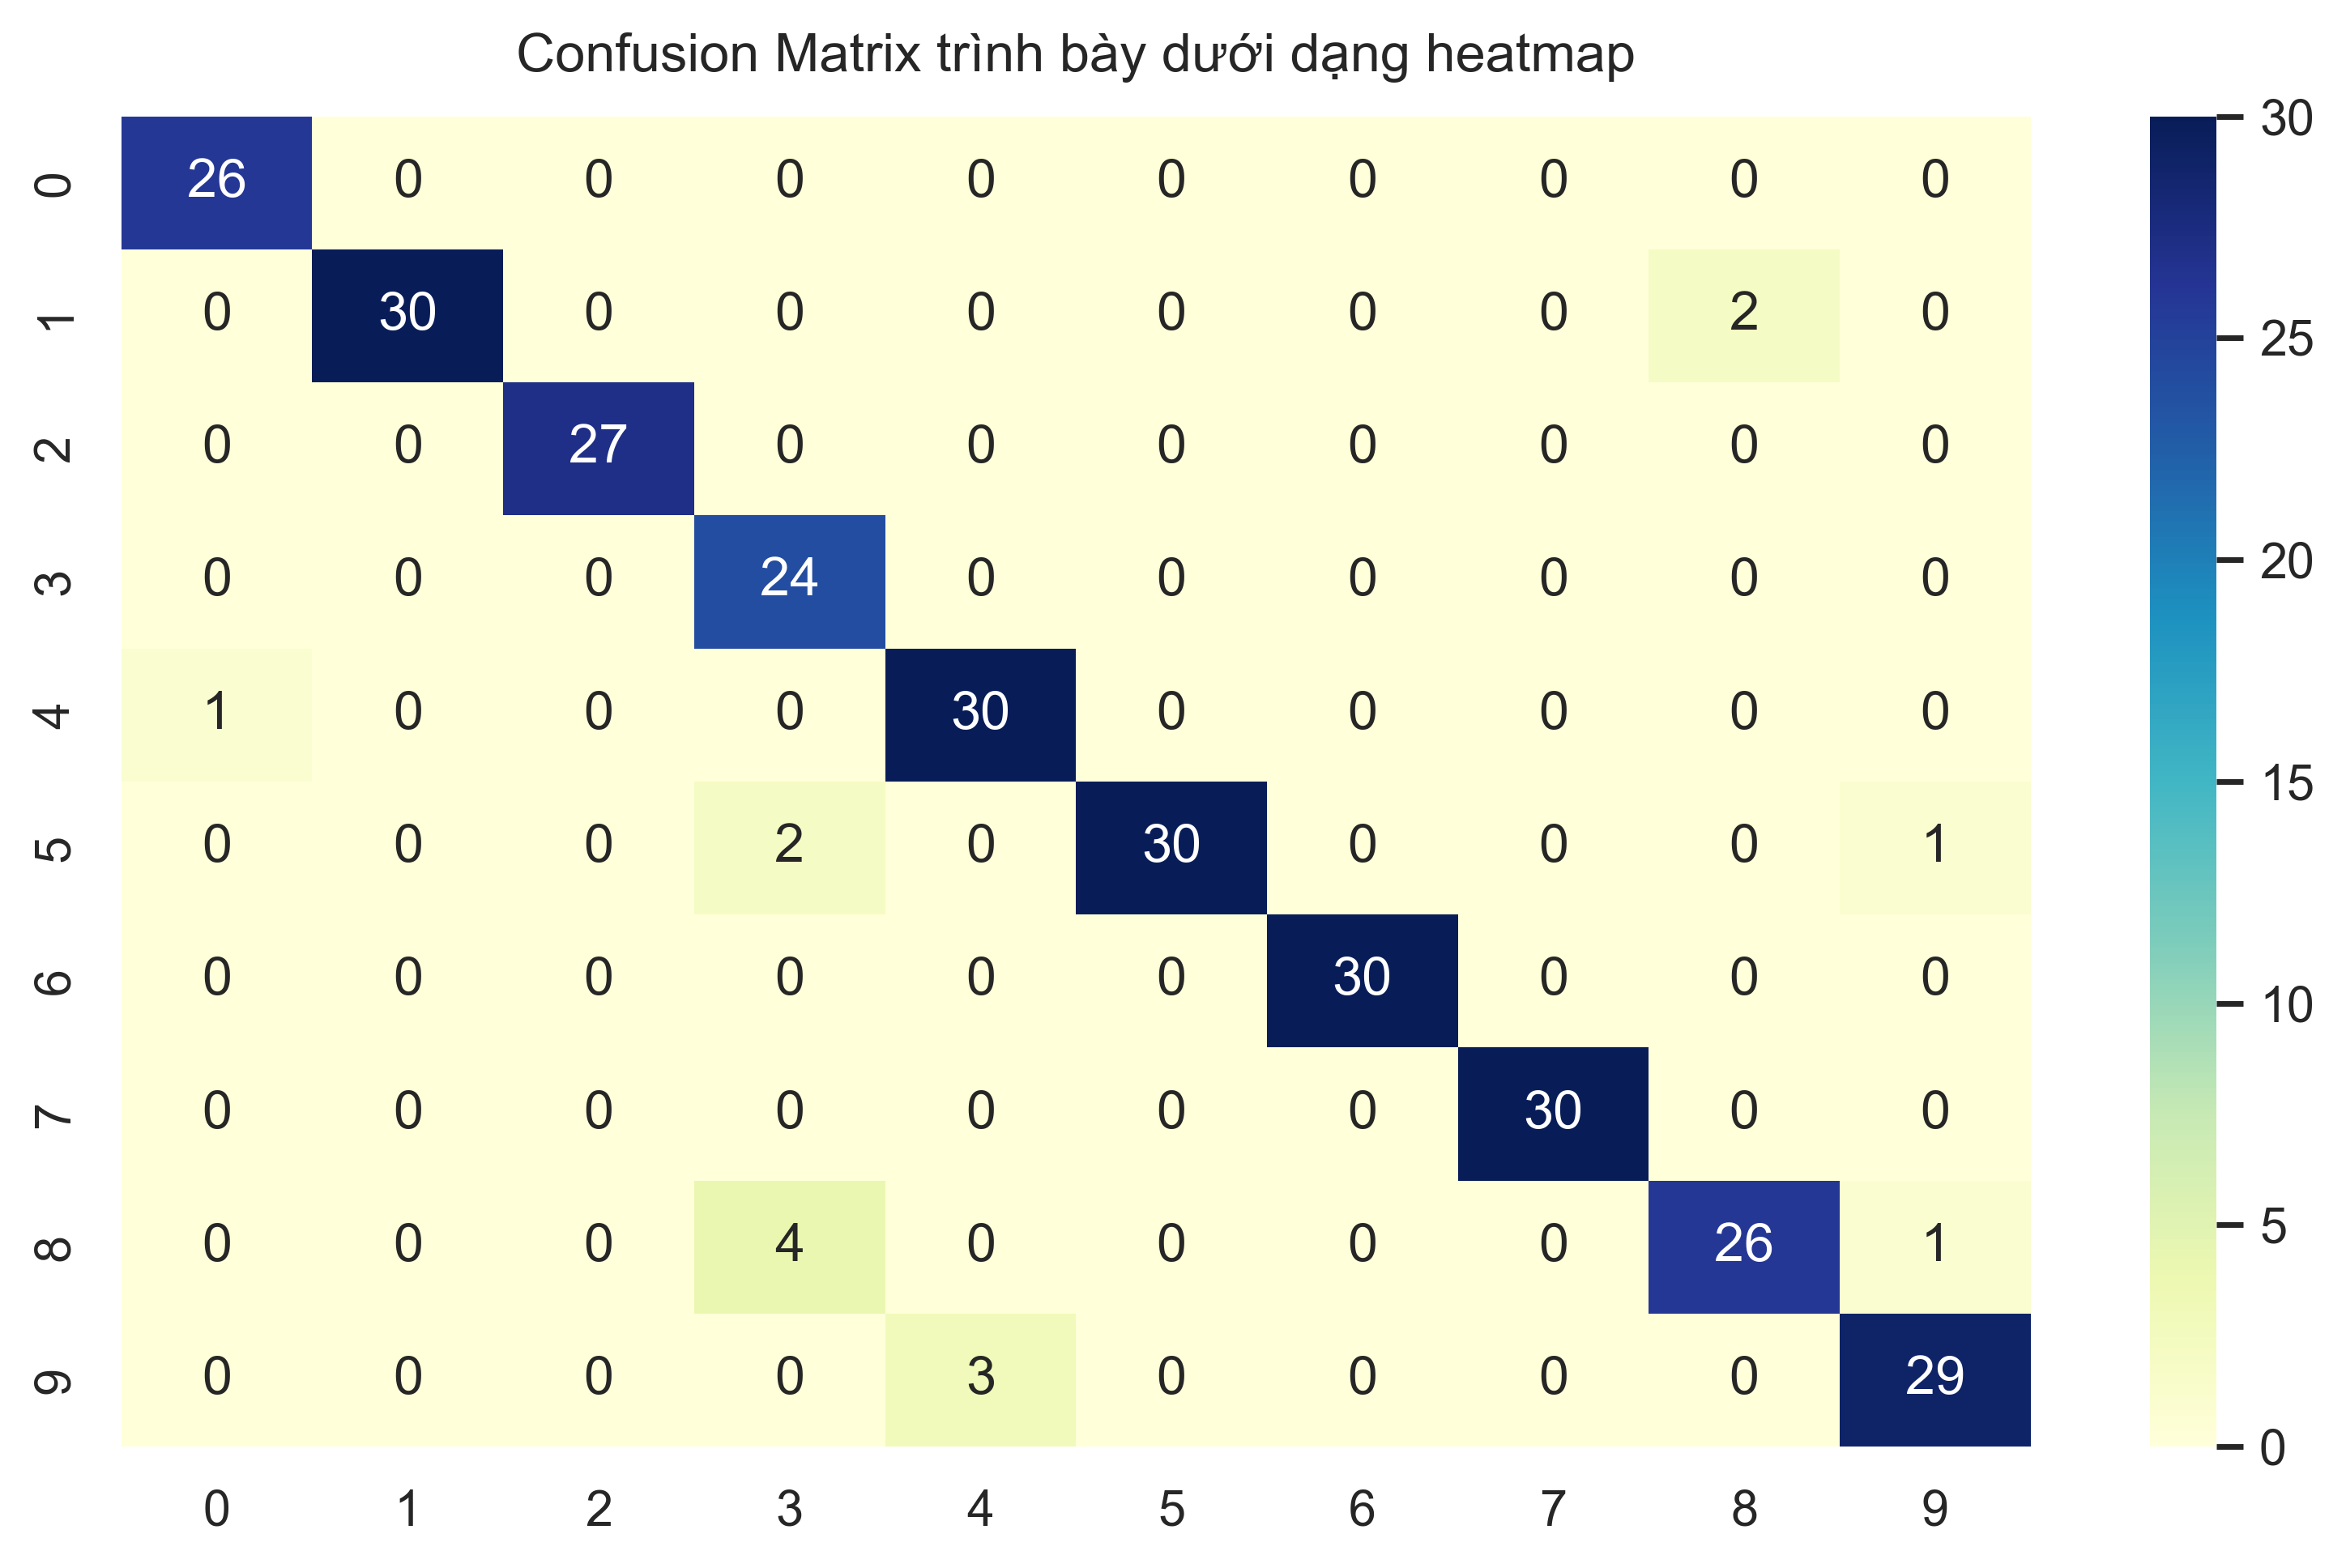

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tạo confusion matrix
cm = confusion_matrix(predictions, targets[1501:])

# Đưa về DataFrame
conf_matrix = pd.DataFrame(data=cm)

# Thiết lập giao diện và kiểu hiển thị
sns.set(font_scale=1.0)
sns.set_style("dark")

# Vẽ heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)

# Thêm tiêu đề và định dạng
plt.title("Confusion Matrix trình bày dưới dạng heatmap", fontsize=12, pad=10)
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()

# Chỉ gọi plt.show() MỘT LẦN, sau cùng
plt.show()

# Không để cell kết thúc bằng một đối tượng (vd. 'conf_matrix' hoặc 'ax')
# => tránh Jupyter tự hiển thị lại ma trận thứ 2


Biểu đồ Confusion Matrix cho thấy phần lớn các giá trị nằm trên đường chéo chính, nghĩa là mô hình SVM dự đoán đúng hầu hết các chữ số viết tay. Một số ô ngoài đường chéo vẫn có giá trị nhỏ, thể hiện các trường hợp nhầm lẫn giữa các chữ số có hình dạng tương tự, chẳng hạn như “8” và “9” hoặc “3” và “5”.

Nhìn chung, mô hình đạt độ chính xác cao, phản ánh khả năng học và phân biệt tốt của SVM trên bộ dữ liệu MNIST. Kết quả này cũng cho thấy việc lựa chọn tham số gamma=0.001 và C=100 là phù hợp, giúp cân bằng giữa việc khớp dữ liệu huấn luyện và khả năng tổng quát hóa trên dữ liệu kiểm thử.

##### 3. In kết quả dạng văn bản

In [34]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



Bảng classification report cho thấy mô hình SVM đạt hiệu suất rất cao trên hầu hết các lớp chữ số. Các chỉ số precision, recall và f1-score đều dao động quanh mức 0.95 – 1.00, chứng tỏ mô hình dự đoán chính xác và cân bằng giữa việc nhận diện đúng (recall) và tránh nhầm lẫn (precision).

Một số lớp như số 2, 6, 7 đạt độ chính xác tuyệt đối (1.00), trong khi các lớp như 3, 8, 9 có f1-score thấp hơn một chút do xuất hiện một vài trường hợp nhầm lẫn.

Tổng thể, độ chính xác toàn mô hình (accuracy = 0.95) chứng minh rằng SVM hoạt động hiệu quả trong việc nhận dạng chữ số viết tay, thể hiện khả năng phân loại tốt và độ ổn định cao trên tập dữ liệu MNIST.